In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns



df=pd.read_csv("E:/PROJECT_02/data_set/amazon_india_complete_2015_2025.csv")

Question 1

Create a comprehensive revenue trend analysis showing yearly revenue growth from 2015-2025. Include percentage growth rates, trend lines, and highlight key growth periods with annotations.



In [5]:
import pandas as pd
import plotly.express as px

yearly = df.groupby('order_year', as_index=False)['final_amount_inr'].sum()
yearly['YoY_pct'] = yearly['final_amount_inr'].pct_change()*100
fig = px.line(yearly, x='order_year', y='final_amount_inr', markers=True, title='Yearly Revenue 2015-2025')
fig.add_bar(x=yearly['order_year'], y=yearly['YoY_pct'], yaxis='y2', name='YoY %')
fig.update_layout(yaxis2=dict(overlaying='y', side='right', title='YoY %'))
fig.show()


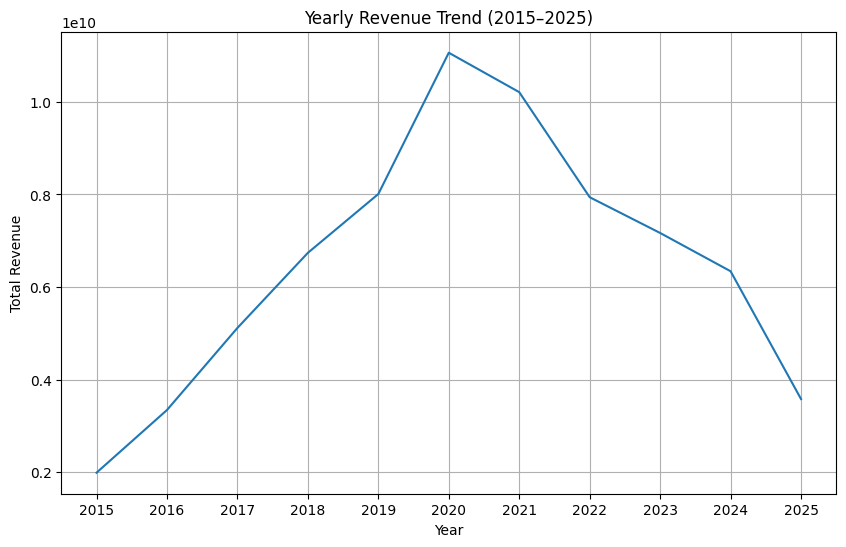

In [6]:
yearly_revenue=df.groupby('order_year')['final_amount_inr'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, markers='0')
plt.xticks(yearly_revenue.index)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Yearly Revenue Trend (2015–2025)')
plt.grid(True)
plt.show()

##Question 2

Analyze seasonal patterns in sales data. Create monthly sales heatmaps and identify peak selling months. Compare seasonal trends across different years and categories.


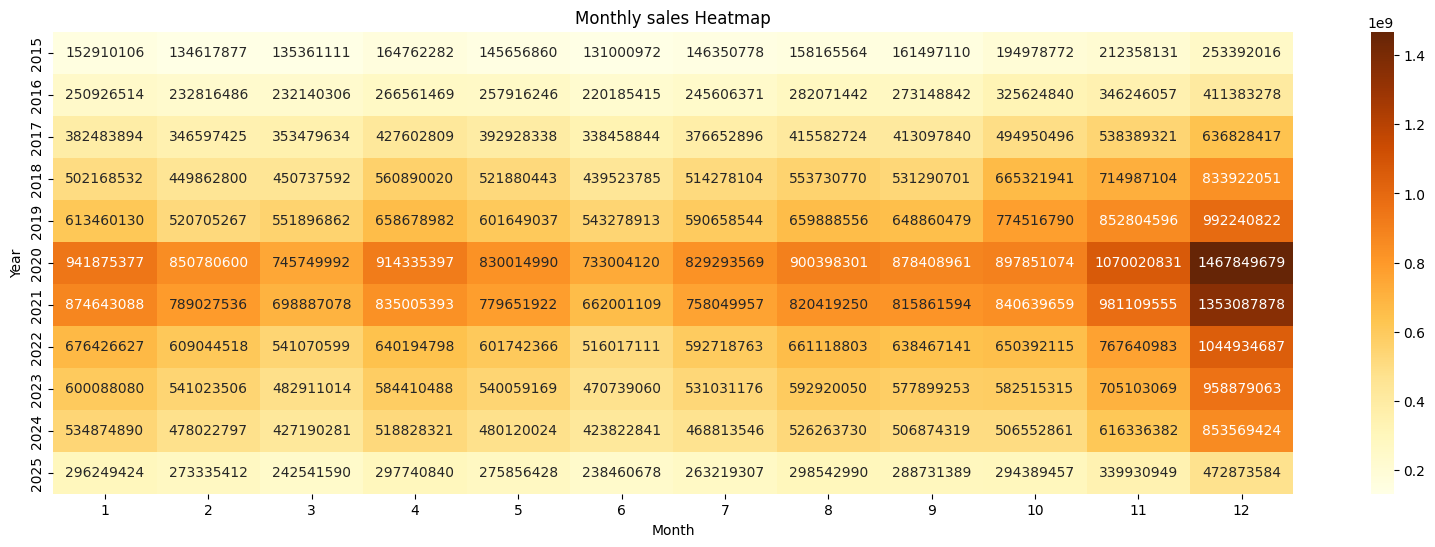

In [ ]:
#monthly sales in heatmap
monthly_revenue=df.groupby(['order_year','order_month'])['final_amount_inr'].sum().unstack()

plt.figure(figsize=(20,6))
sns.heatmap(monthly_revenue, cmap='YlOrBr',annot=True, fmt='.0f')

plt.title('Monthly sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

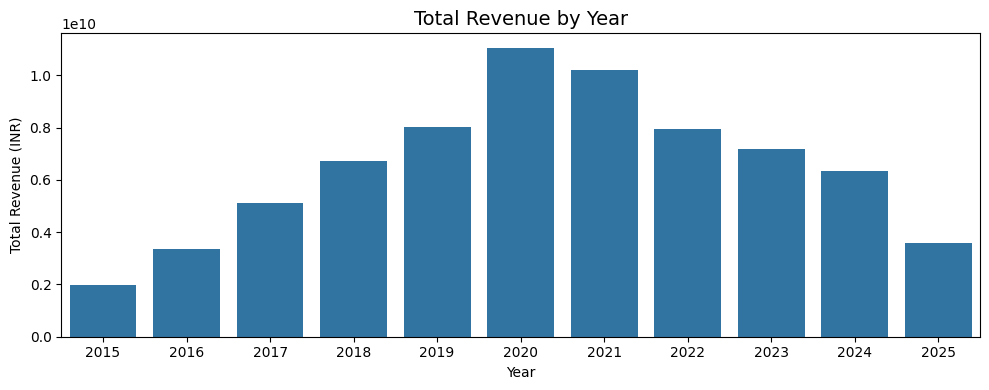

In [34]:
yearly_revenue = df.groupby('order_year')['final_amount_inr'].sum().sort_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=yearly_revenue.index, y=yearly_revenue.values)

plt.title("Total Revenue by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Revenue (INR)")
plt.tight_layout()
plt.show()


Question 3

Build a customer segmentation analysis using RFM (Recency, Frequency, Monetary) methodology. Create scatter plots and segment customers into meaningful groups with actionable insights.


In [4]:
df['order_date']= pd.to_datetime(df['order_date'], errors='coerce')

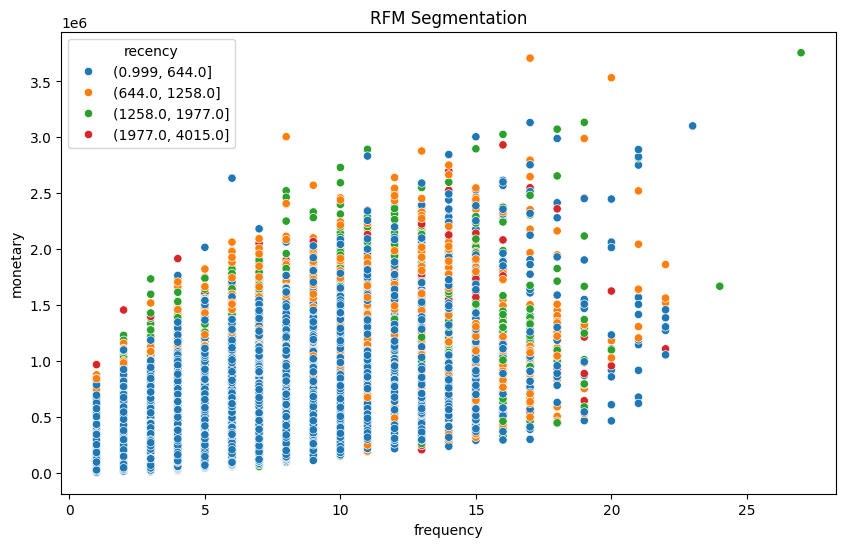

In [50]:
df_rfm = df.dropna(subset=['order_date']).copy()

ref_date=df_rfm['order_date'].max()+pd.Timedelta(days=1)

rfm=df_rfm.groupby('customer_id').agg({
    'order_date':lambda x:(ref_date-x.max()).days,
    'transaction_id':'count',
    'final_amount_inr':'sum'
}).rename(columns={'order_date':'Recency','transaction_id':'Frequency','final_amount_inr':'Monetary'})

rfm.columns=['recency','frequency','monetary']
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x="frequency", y="monetary", hue=pd.qcut(rfm['recency'],4))
plt.title("RFM Segmentation")
plt.show()

Question 4

Visualize the evolution of payment methods from 2015-2025. Show the rise of UPI, decline of COD, and create stacked area charts to demonstrate market share changes over time.


Text(0, 0.5, 'Revenue (INR)')

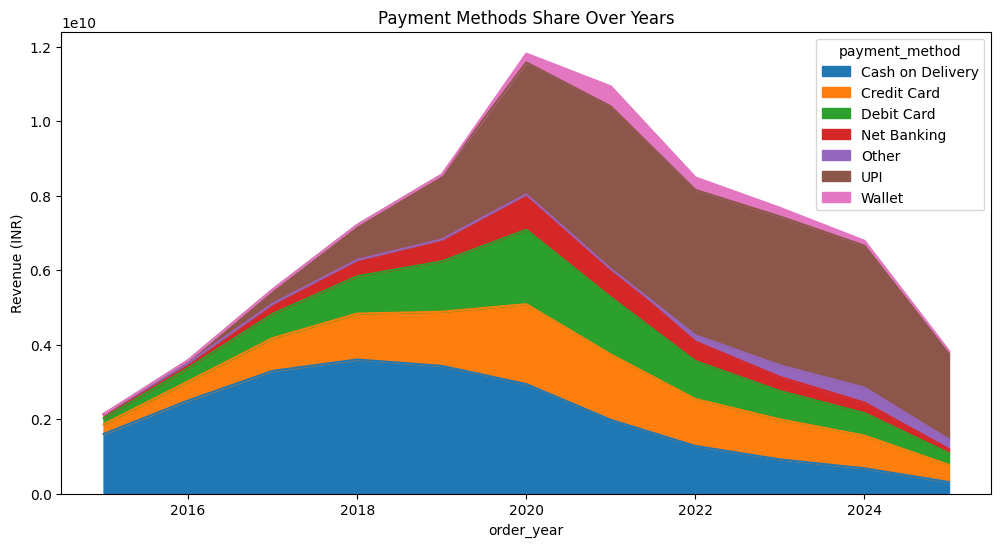

In [52]:
payment_tr=df.groupby(['order_year','payment_method'])['final_amount_inr'].sum().reset_index()
payment_tr=payment_tr.pivot(index='order_year', columns='payment_method',values='final_amount_inr')

payment_tr.plot(kind='area', stacked=True, figsize=(12,6))

plt.title("Payment Methods Share Over Years")
plt.ylabel("Revenue (INR)")

Question 5

Perform category-wise performance analysis. Create treemaps, bar charts, and pie charts showing revenue contribution, growth rates, and market share for each product category.


Text(0.5, 1.0, 'Category Revenue Contribution')

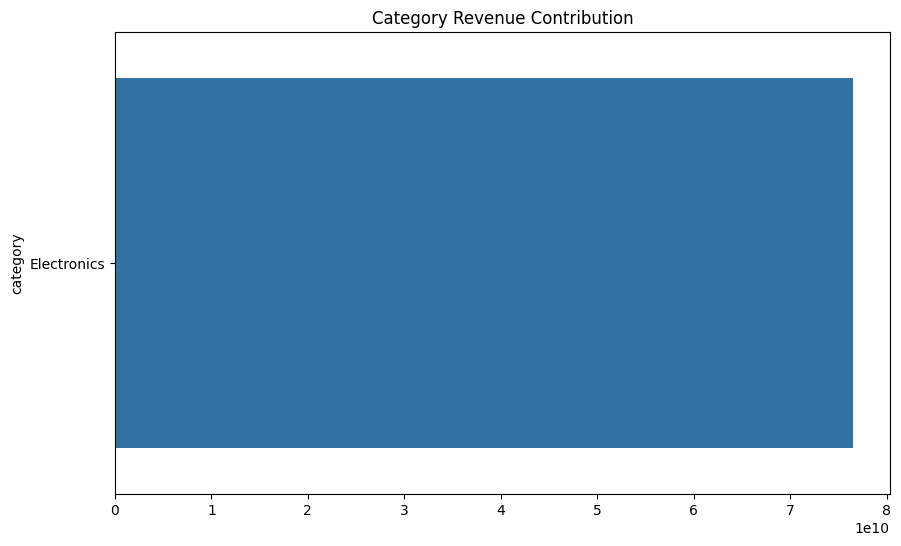

In [54]:
category_type=df.groupby('category')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_type.values, y=category_type.index)
plt.title("Category Revenue Contribution")

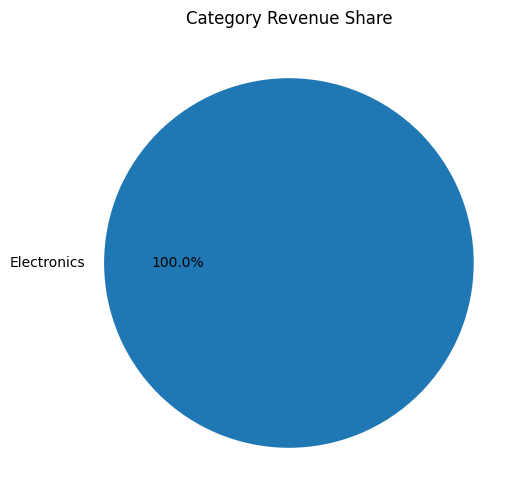

In [55]:
plt.figure(figsize=(10,6))
plt.pie(category_type.values,labels=category_type.index,autopct='%1.1f%%')
plt.title("Category Revenue Share")
plt.show()

Question 6

Analyze Prime membership impact on customer behavior. Compare average order values, order frequency, and category preferences between Prime and non-Prime customers using multiple visualization types.


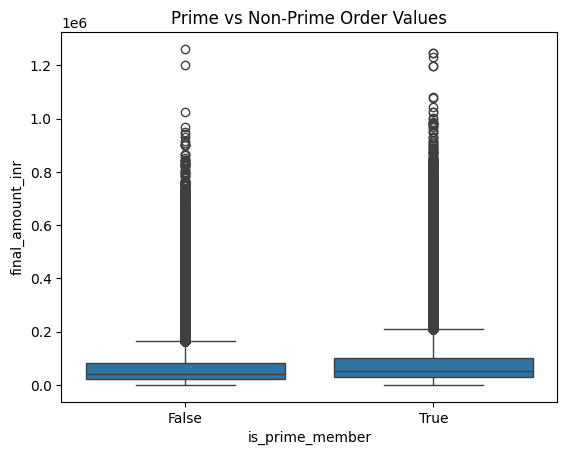

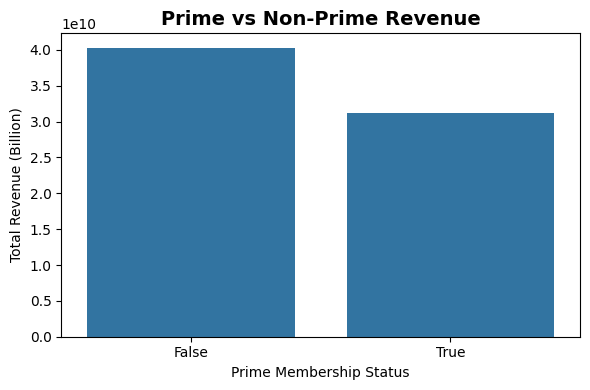

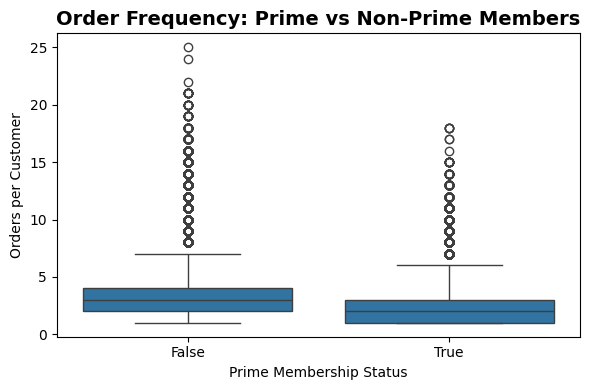

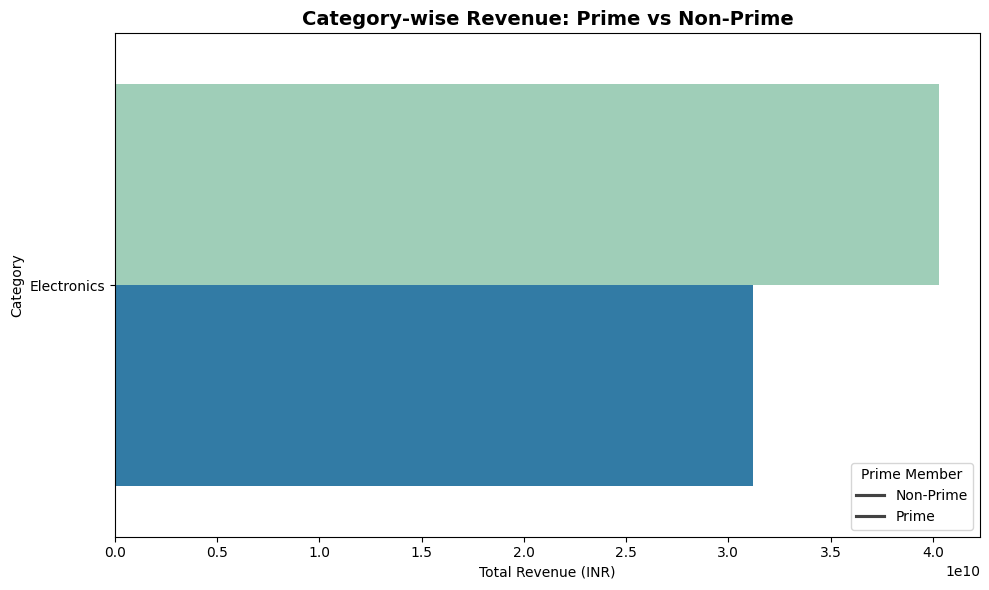

In [14]:
# 1.andPrime vs Non-Prime Order Values

prime_analyze = (
    df.groupby('is_prime_member')['final_amount_inr']
      .agg(['sum', 'mean', 'count'])
      .reset_index()
)
sns.boxplot(x='is_prime_member',y='final_amount_inr',data=df)
plt.title("Prime vs Non-Prime Order Values")



# 2: Plot total revenue comparison
plt.figure(figsize=(6,4))
sns.barplot(
    x='is_prime_member',
    y='sum',
    data=prime_analyze,
    
)

plt.title("Prime vs Non-Prime Revenue", fontsize=14, weight='bold')
plt.xlabel("Prime Membership Status")
plt.ylabel("Total Revenue (Billion)")
plt.tight_layout()
plt.show()

# Number of orders placed by each customer
order_freq = (
    df.groupby('customer_id')['transaction_id']
      .nunique()
      .reset_index()
      .rename(columns={'transaction_id': 'order_count'})
)

# Merge with prime membership info (if available)
order_freq = order_freq.merge(df[['customer_id', 'is_prime_member']].drop_duplicates(), on='customer_id')
order_freq.head()

# 3.Order Frequency: Prime vs Non-Prime Members
plt.figure(figsize=(6,4))
sns.boxplot(
    x='is_prime_member',
    y='order_count',
    data=order_freq,
   
)

plt.title("Order Frequency: Prime vs Non-Prime Members", fontsize=14, weight='bold')
plt.xlabel("Prime Membership Status")
plt.ylabel("Orders per Customer")
plt.tight_layout()
plt.show()

# 4.Category-wise Revenue: Prime vs Non-Prime
cat_pref = (
    df.groupby(['is_prime_member', 'category'])['final_amount_inr']
      .sum()
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=cat_pref, x='final_amount_inr', y='category', hue='is_prime_member', palette='YlGnBu' )

plt.title("Category-wise Revenue: Prime vs Non-Prime", fontsize=14, weight='bold')
plt.xlabel("Total Revenue (INR)")
plt.ylabel("Category")
plt.legend(title="Prime Member", labels=["Non-Prime","Prime"])
plt.tight_layout()
plt.show()




Question 7

Create geographic analysis of sales performance across Indian cities and states. Build choropleth maps and bar charts showing revenue density and growth patterns by tier (Metro/Tier1/Tier2/Rural).


Text(0.5, 1.0, 'Top city by Revenue')

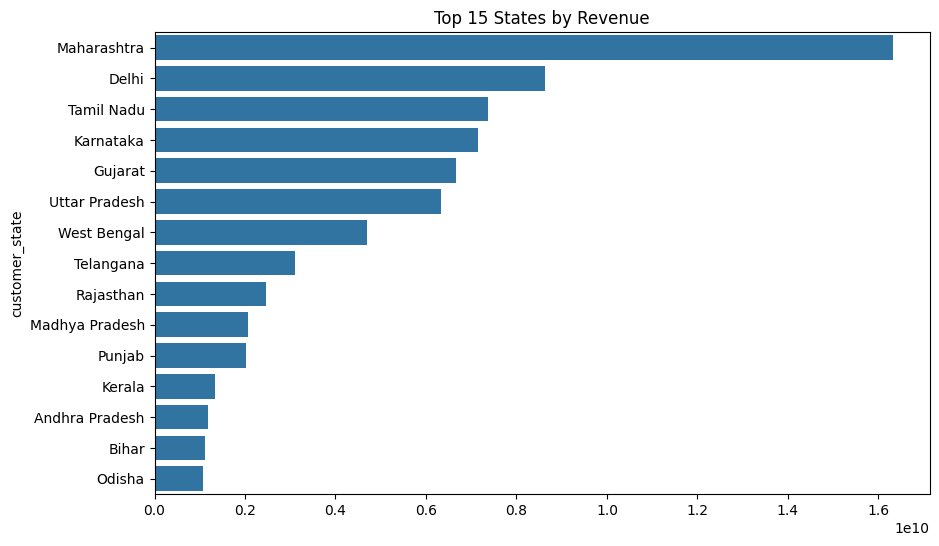

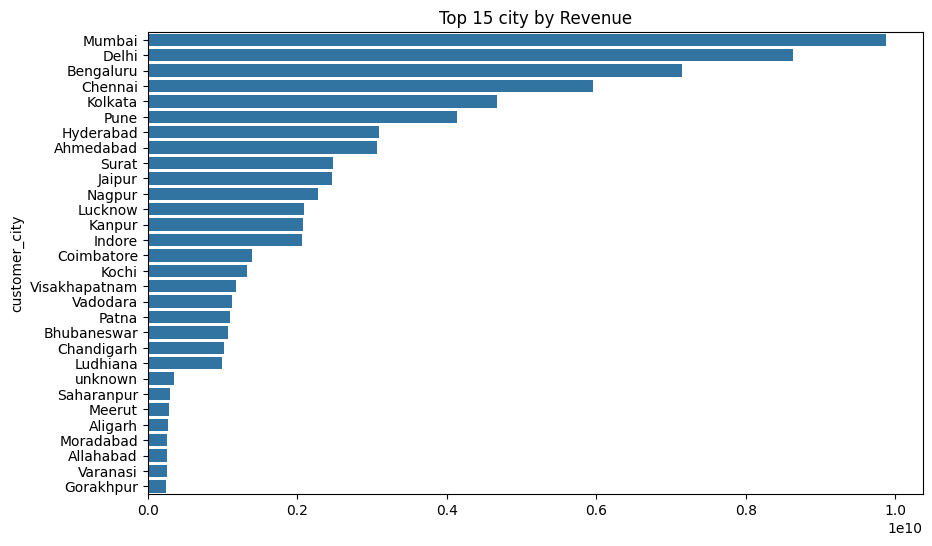

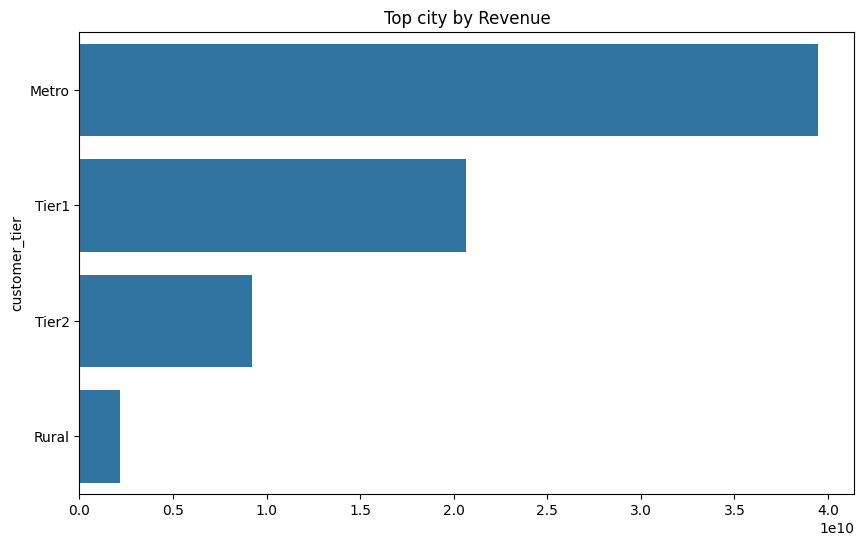

In [16]:
#Top states
state_rev = df.groupby('customer_state')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=state_rev.values, y=state_rev.index)
plt.title("Top 15 States by Revenue")

#Top citys
city_rev = df.groupby('customer_city')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=city_rev.values, y=city_rev.index)
plt.title("Top 15 city by Revenue")

#Top city by Revenue and customer tier
state_rev = df.groupby('customer_tier')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=state_rev.values, y=state_rev.index)
plt.title("Top city by Revenue")

Question 8

Study festival sales impact using before/during/after analysis. Visualize revenue spikes during Diwali, Prime Day, and other festivals with detailed time series analysis.


C:\Users\Praveen\AppData\Local\Temp\ipykernel_4488\3278372916.py:13: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Festival Period: 2015-01-03 to 2025-12-07


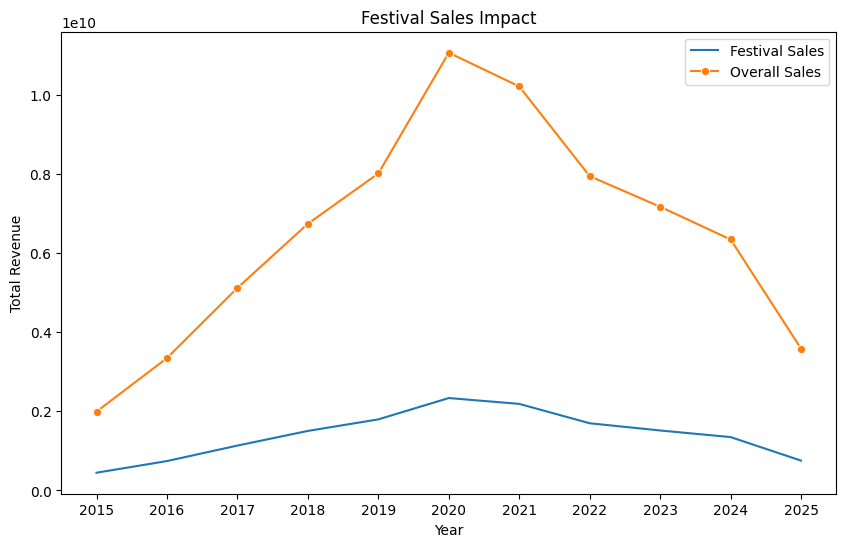

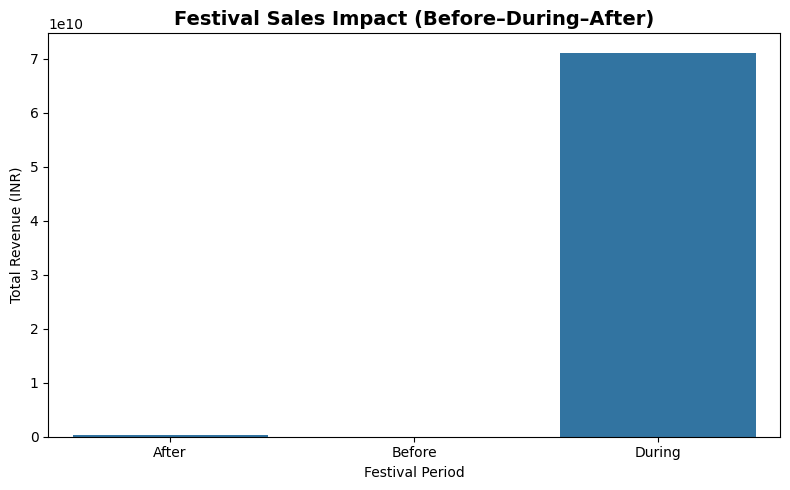

In [18]:
festivals=df[df['is_festival_sale']==1].groupby('order_year')['final_amount_inr'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=festivals.index, y=festivals.values, markers=True,label="Festival Sales")
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker="o", label="Overall Sales")
plt.title("Festival Sales Impact")
plt.xticks(festivals.index)
plt.xlabel('Year')
plt.ylabel('Total Revenue')

#Festival Sales Impact (Before–During–After)
# Ensure 'order_date' is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Step 1: Identify festival start & end dates automatically
festival_days = df[df['is_festival_sale'] == 1]['order_date']
festival_start = festival_days.min()
festival_end = festival_days.max()

print(f"Festival Period: {festival_start.date()} to {festival_end.date()}")

# Step 2: Classify each order as Before, During, or After
def classify_festival_period(date):
    if date < festival_start - pd.Timedelta(days=15):
        return 'Before'
    elif festival_start - pd.Timedelta(days=15) <= date <= festival_end + pd.Timedelta(days=10):
        if festival_start <= date <= festival_end:
            return 'During'
        elif date < festival_start:
            return 'Before'
        else:
            return 'After'
    else:
        return 'After'

df['festival_period'] = df['order_date'].apply(classify_festival_period)

# Step 3: Aggregate sales data
festival_sales = (
    df.groupby('festival_period')['final_amount_inr']
      .agg(['sum', 'mean', 'count'])
      .reset_index()
      .rename(columns={'sum':'Total_Sales', 'mean':'Avg_Order_Value', 'count':'Orders'})
)

# Step 4: Visualize impact
plt.figure(figsize=(8,5))
sns.barplot(data=festival_sales, x='festival_period', y='Total_Sales')
plt.title("Festival Sales Impact (Before–During–After)", fontsize=14, weight='bold')
plt.xlabel("Festival Period")
plt.ylabel("Total Revenue (INR)")
plt.tight_layout()
plt.show()


Question 9

Analyze customer age group behavior and preferences. Create demographic analysis with category preferences, spending patterns, and shopping frequency across different age segments.


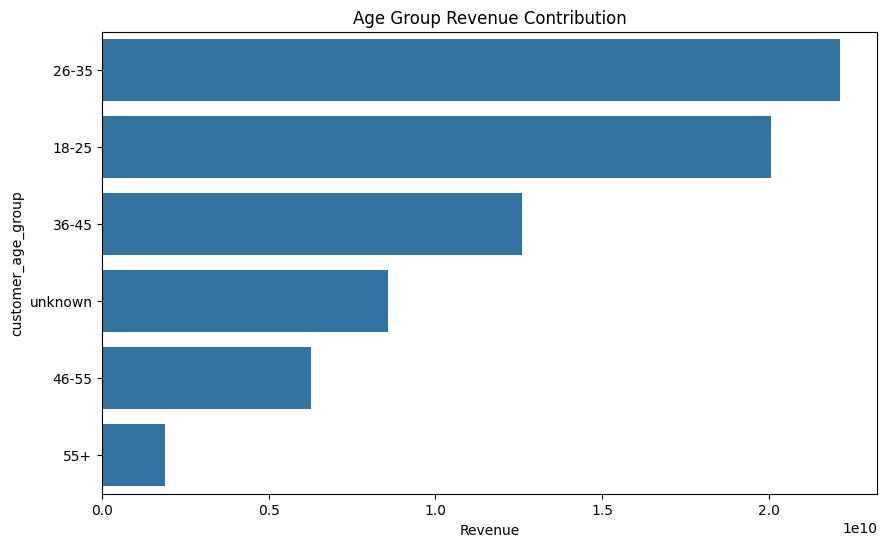

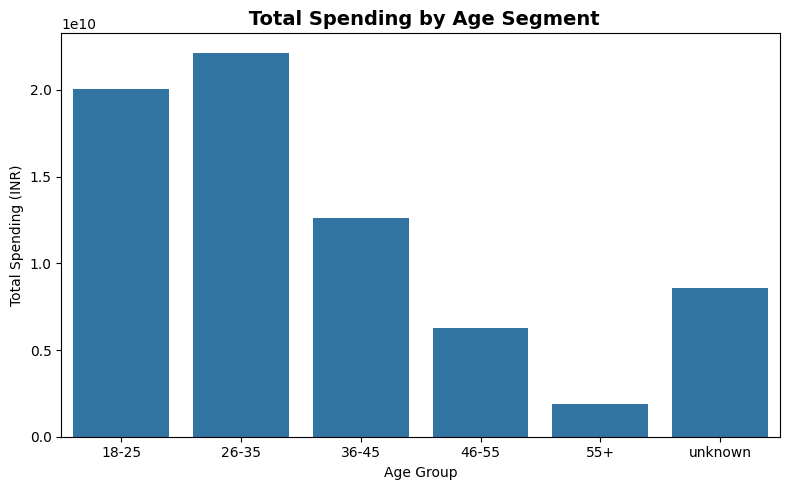

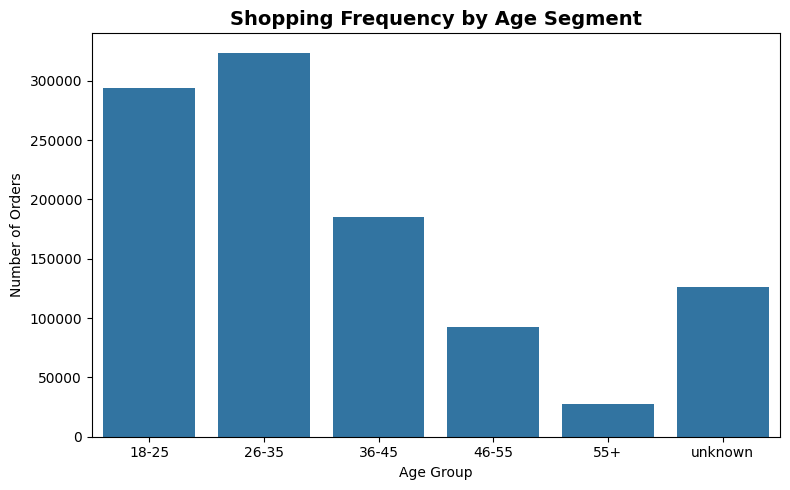

In [20]:
#1.Age Group Revenue Contribution
age_group=df.groupby('customer_age_group')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=age_group.values, y=age_group.index)
plt.title("Age Group Revenue Contribution")
plt.xlabel("Revenue")

age_stats = (
    df.groupby('customer_age_group')['final_amount_inr']
      .agg(['sum', 'mean', 'count'])
      .reset_index()
      .rename(columns={
          'sum':'Total_Spending',
          'mean':'Avg_Order_Value',
          'count':'Total_Orders'
      })
)
age_stats


age_cat_pref = (
    df.groupby(['customer_age_group', 'category'])['final_amount_inr']
      .sum()
      .reset_index()
)

#  Use transform instead of apply for proper alignment
age_cat_pref['Share_%'] = (
    age_cat_pref.groupby('customer_age_group')['final_amount_inr']
    .transform(lambda x: 100 * x / x.sum())
)

plt.figure(figsize=(8,5))
sns.barplot(data=age_stats, x='customer_age_group', y='Total_Spending')
plt.title(" Total Spending by Age Segment", fontsize=14, weight='bold')
plt.xlabel("Age Group")
plt.ylabel("Total Spending (INR)")
plt.tight_layout()
plt.show()

#Shopping Frequency by Age Segment
plt.figure(figsize=(8,5))
sns.barplot(data=age_stats, x='customer_age_group', y='Total_Orders')
plt.title("Shopping Frequency by Age Segment", fontsize=14, weight='bold')
plt.xlabel("Age Group")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

Question 10

Build price vs demand analysis using scatter plots and correlation matrices. Analyze how pricing strategies affect sales volumes across different categories and customer segments.


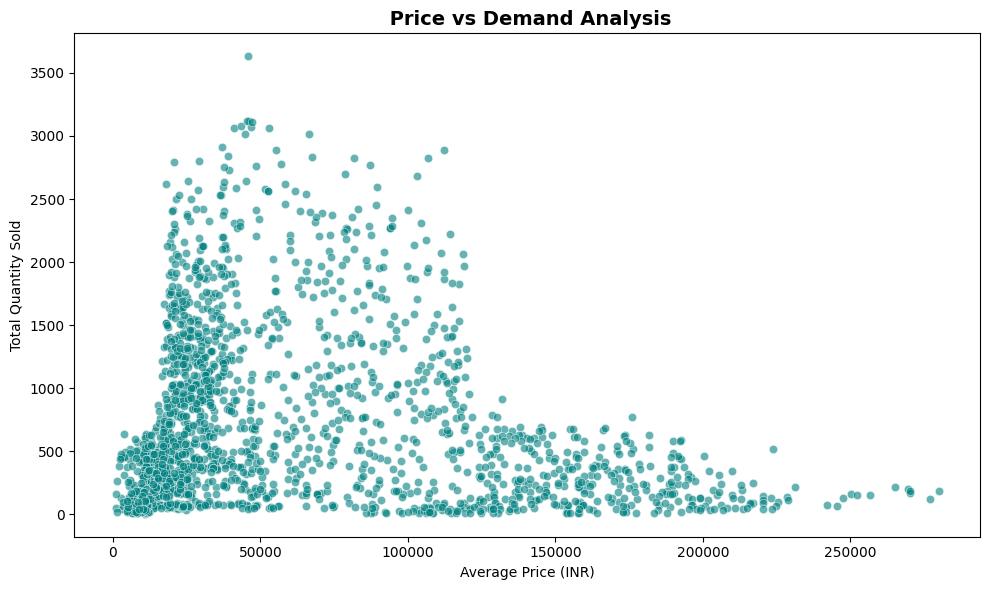

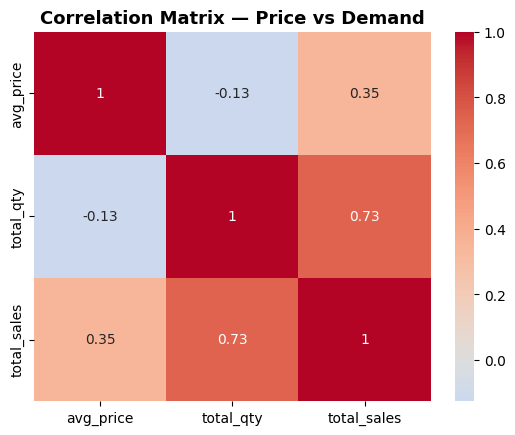

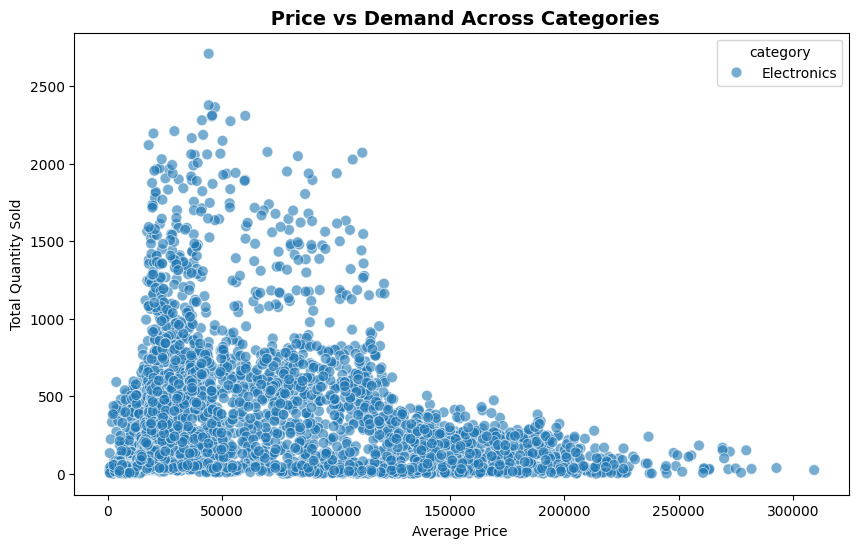

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Aggregate price and demand metrics ---
supply_demand = (
    df.groupby('product_id')
      .agg(
          avg_price=('discounted_price_inr', 'mean'),
          total_qty=('quantity', 'sum'),
          total_sales=('final_amount_inr', 'sum')
      )
      .reset_index()
)

# --- Step 2: Scatter plot (Price vs Demand) ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=supply_demand,
    x='avg_price',         #  use the aggregated column
    y='total_qty',         # 
    
    alpha=0.6,
    color='teal'
)
plt.title(" Price vs Demand Analysis", fontsize=14, weight='bold')
plt.xlabel("Average Price (INR)")
plt.ylabel("Total Quantity Sold")
plt.tight_layout()
plt.show()

#---step 3:correlation matrix
corr_total = supply_demand[['avg_price', 'total_qty', 'total_sales']].corr()
sns.heatmap(corr_total, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix — Price vs Demand", fontsize=13, weight='bold')
plt.show()

# --- Aggregate by product, category, and segment ---
price_demand_seg = (
    df.groupby(['category', 'is_prime_member', 'product_id'])
      .agg(
          avg_price=('discounted_price_inr', 'mean'),
          total_qty=('quantity', 'sum'),
          total_sales=('final_amount_inr', 'sum')
      )
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=price_demand_seg,
    x='avg_price',
    y='total_qty',
    hue='category',
    alpha=0.6,
    s=60
)
plt.title(" Price vs Demand Across Categories", fontsize=14, weight='bold')
plt.xlabel("Average Price ")
plt.ylabel("Total Quantity Sold")
plt.show()



Question 11

Create delivery performance analysis showing delivery days distribution, on-time performance, and customer satisfaction correlation with delivery speed across different cities and customer tiers.


Text(0.5, 1.0, 'Distribution of Delivery Days')

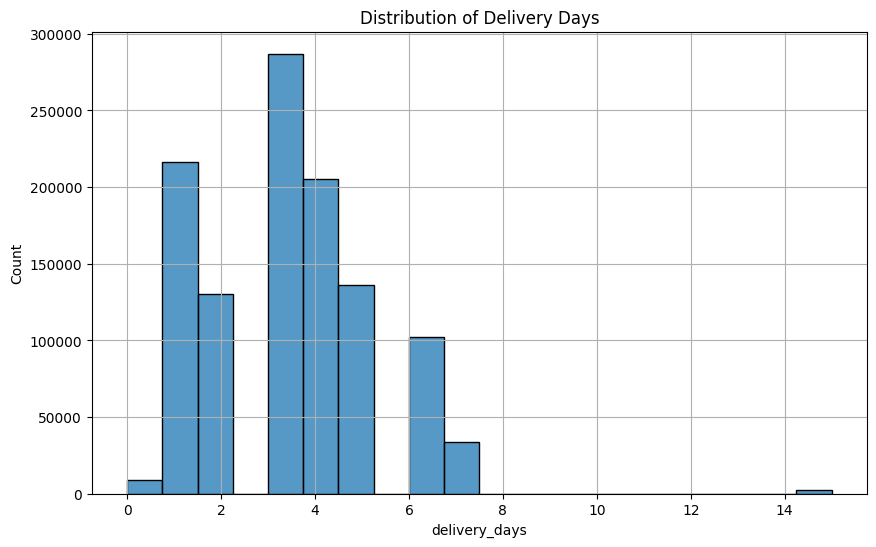

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['delivery_days'], bins=20)
plt.grid()
plt.title("Distribution of Delivery Days")

  customer_city  avg_delivery_days  on_time_pct  orders
5        Jaipur               3.22        88.58   40251
8          Pune               3.22        88.43   67392
0     Ahmedabad               3.23        88.42   50596
9         Surat               3.23        88.29   40177
2       Chennai               3.35        87.50   84062
6       Kolkata               3.35        87.42   66253
1     Bengaluru               3.35        87.40  102006
3         Delhi               3.35        87.39  122859
4     Hyderabad               3.35        87.30   44346
7        Mumbai               3.36        87.23  140601


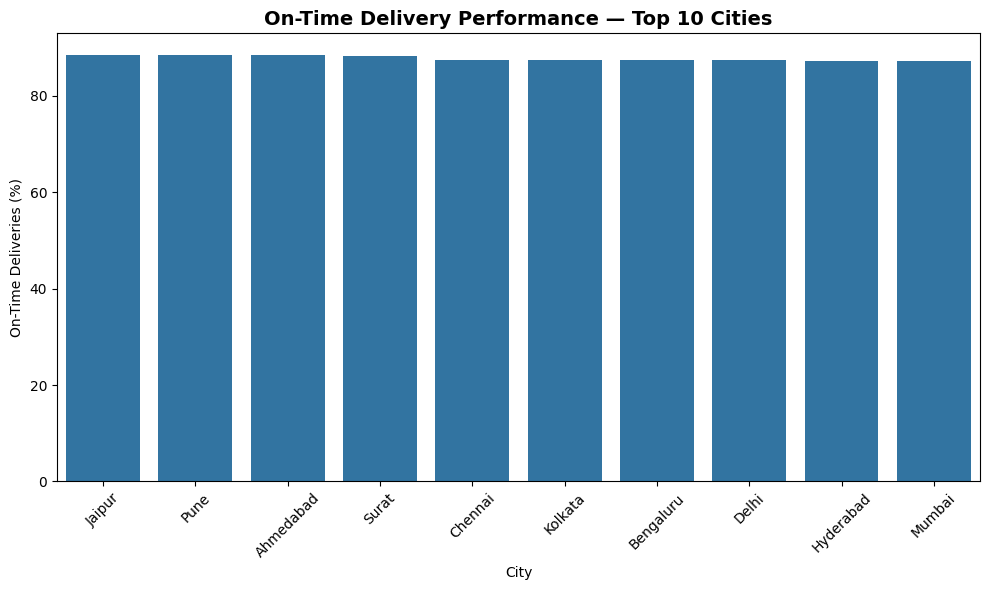

In [148]:
df['delivery_days']=df['delivery_days'].astype(int)
# Assume standard delivery threshold = 5 days (you can change it)
df['is_on_time'] = df['delivery_days'] <= 5

# Top 10 cities by order count
top_cities = df['customer_city'].value_counts().head(10).index

# Group and compute metrics
city_perf = (
    df[df['customer_city'].isin(top_cities)]
    .groupby('customer_city')
    .agg(
        avg_delivery_days=('delivery_days', 'mean'),
        on_time_pct=('is_on_time', lambda x: x.mean() * 100),
        orders=('transaction_id', 'nunique')
    )
    .reset_index()
    .sort_values('on_time_pct', ascending=False)
)

print(city_perf.round(2))

plt.figure(figsize=(10,6))
sns.barplot(
    data=city_perf,
    x='customer_city',
    y='on_time_pct',
   
)
plt.title("On-Time Delivery Performance — Top 10 Cities", fontsize=14, weight='bold')
plt.xlabel("City")
plt.ylabel("On-Time Deliveries (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question 12

Analyze return patterns and customer satisfaction using return rates, reasons, and correlation with product ratings, prices, and categories through multiple visualization techniques


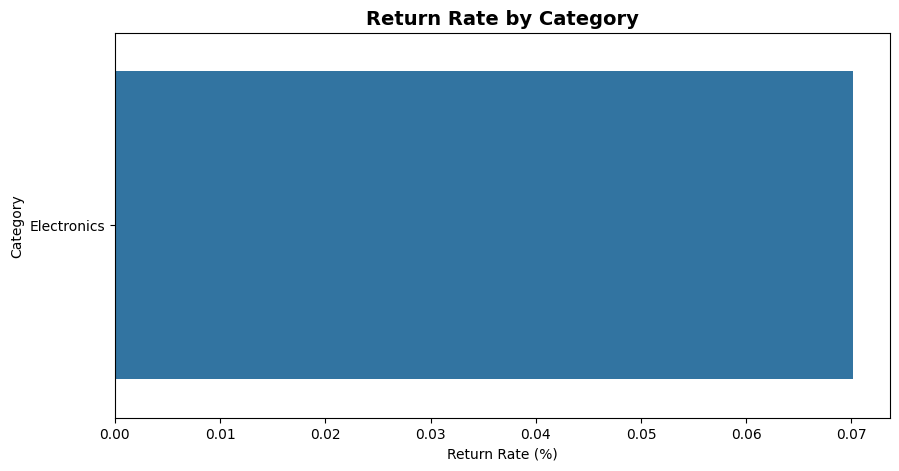

C:\Users\Praveen\AppData\Local\Temp\ipykernel_10148\206966266.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



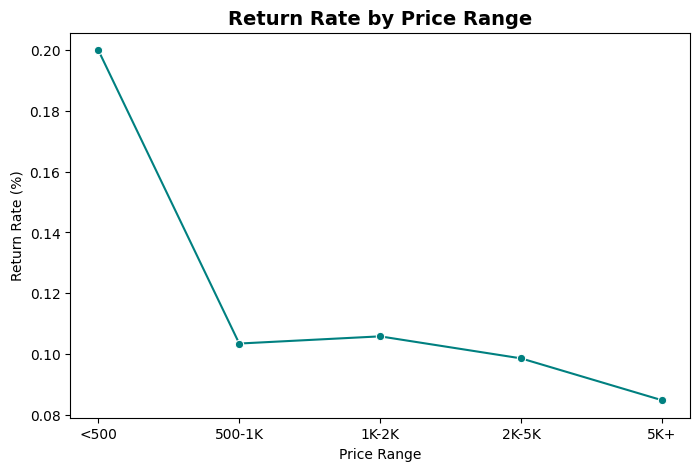

C:\Users\Praveen\AppData\Local\Temp\ipykernel_10148\206966266.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




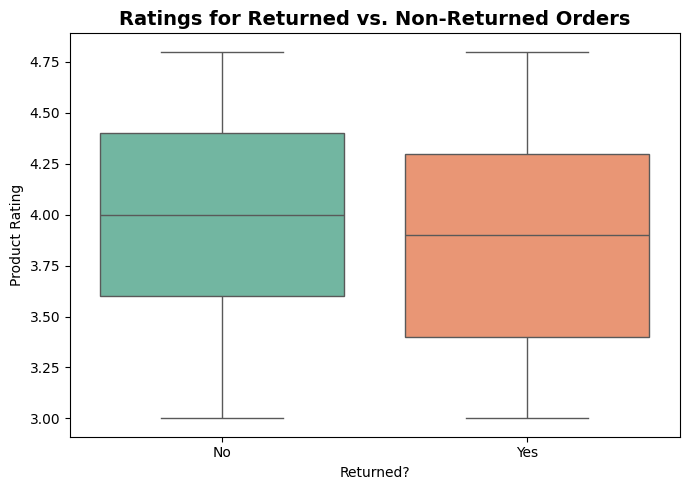

In [157]:
#Create return flag
df['is_returned'] = df['return_status'].str.lower().eq('returned')

# Compute return rate by category
return_rate_cat = (
    df.groupby('category')['is_returned']
      .mean()
      .reset_index()
      .rename(columns={'is_returned':'return_rate'})
)

plt.figure(figsize=(10,5))
sns.barplot(data=return_rate_cat, x='return_rate', y='category')
plt.title("Return Rate by Category", fontsize=14, weight='bold')
plt.xlabel("Return Rate (%)")
plt.ylabel("Category")
plt.show()

#Return rate vs Product price
df['price_bin'] = pd.cut(df['discounted_price_inr'], bins=[0, 500, 1000, 2000, 5000, 10000], 
                         labels=['<500','500-1K','1K-2K','2K-5K','5K+'])

price_return = (
    df.groupby('price_bin')['is_returned']
      .mean()
      .reset_index()
      .rename(columns={'is_returned':'return_rate'})
)

plt.figure(figsize=(8,5))
sns.lineplot(data=price_return, x='price_bin', y='return_rate', marker='o', color='teal')
plt.title("Return Rate by Price Range", fontsize=14, weight='bold')
plt.xlabel("Price Range")
plt.ylabel("Return Rate (%)")
plt.show()


plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='is_returned', y='product_rating', palette='Set2')
plt.title("Ratings for Returned vs. Non-Returned Orders", fontsize=14, weight='bold')
plt.xlabel("Returned?")
plt.ylabel("Product Rating")
plt.xticks([0,1], ["No","Yes"])
plt.tight_layout()
plt.show()


Question 13

Study brand performance and market share evolution. Create brand comparison charts, market share trends, and competitive positioning analysis across different categories.


Text(0.5, 0, 'Revanue')

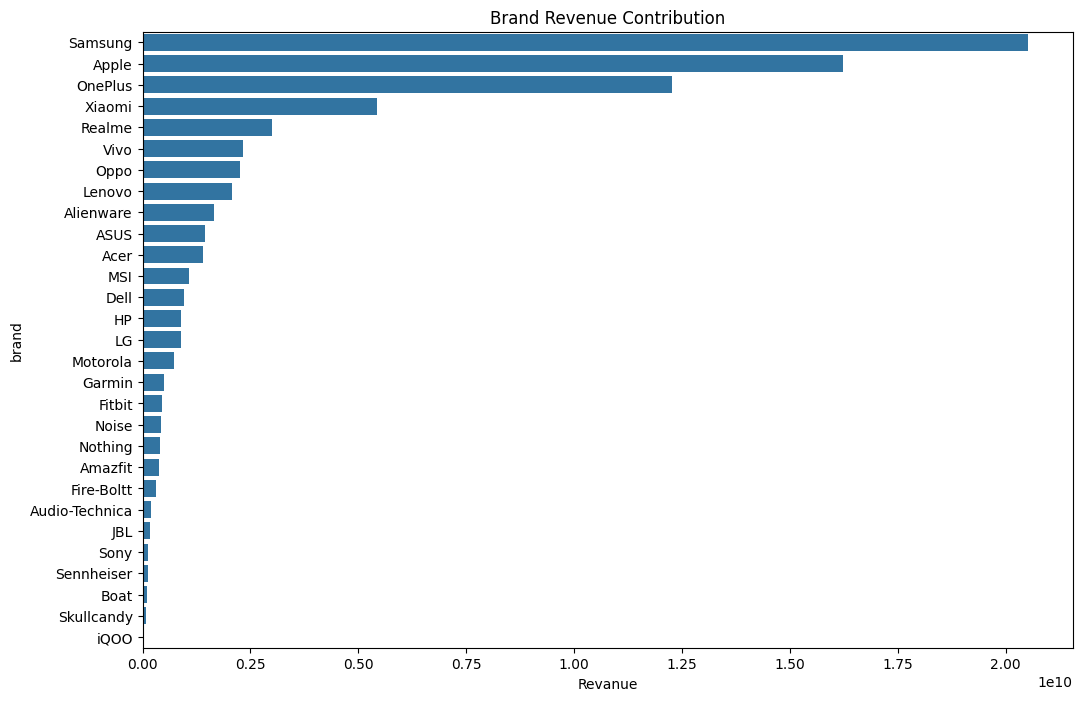

In [159]:
brand_performance=df.groupby('brand')['final_amount_inr'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=brand_performance.values, y=brand_performance.index)
plt.title("Brand Revenue Contribution")
plt.xlabel("Revanue")

Top brands in 2025


,brand,rev_latest,rev_prev,yoy_pct
0,Samsung,1023191256.77,1817912774.57,-43.7%
1,Apple,832148895.44,1477946917.88,-43.7%
2,OnePlus,608018537.77,1082419372.25,-43.8%
3,Xiaomi,258404933.4,459050466.63,-43.7%
4,Realme,190376452.37,322851479.37,-41.0%
5,Nothing,99484463.53,144822792.92,-31.3%
6,Lenovo,93662686.01,179548886.37,-47.8%
7,Oppo,80335462.52,155401403.77,-48.3%
8,Vivo,78109731.99,163179342.35,-52.1%
9,Alienware,67958935.16,136340348.74,-50.2%


<Figure size 1200x600 with 0 Axes>

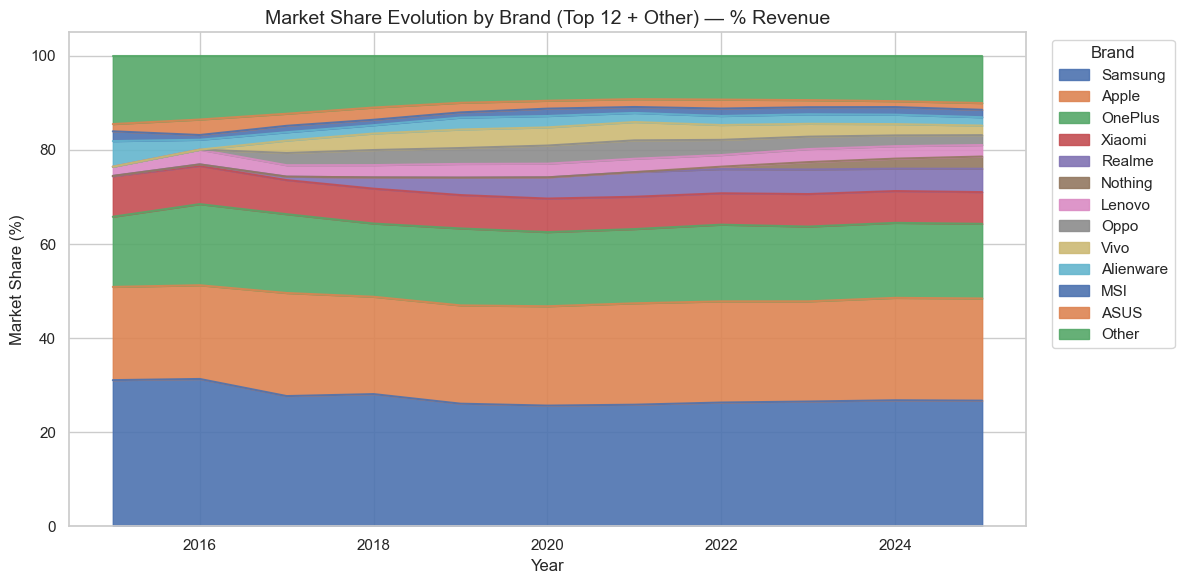

,category,hhi,interpretation
0,Electronics,0.15437,Moderately concentrated


C:\Users\Praveen\AppData\Local\Temp\ipykernel_10148\886477823.py:104: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




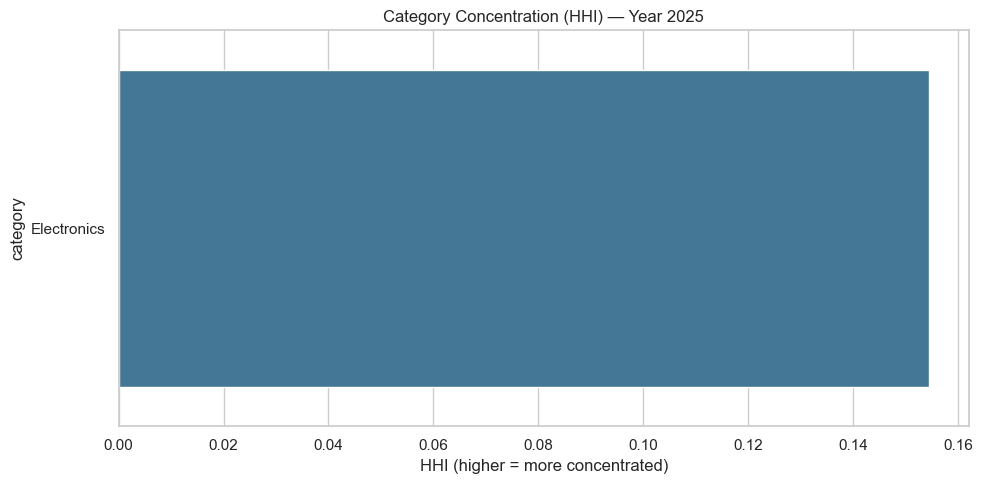

Top movers since previous year (positive = improved rank):


,brand,rank_latest,rank_prev,delta
0,Skullcandy,24,29,5
1,Nothing,6,9,3
2,Garmin,18,21,3
3,iQOO,23,25,2
4,Audio-Technica,22,23,1
5,ASUS,12,13,1
6,Noise,19,19,0
7,Oppo,8,8,0
8,Fire-Boltt,17,17,0
9,Xiaomi,4,4,0


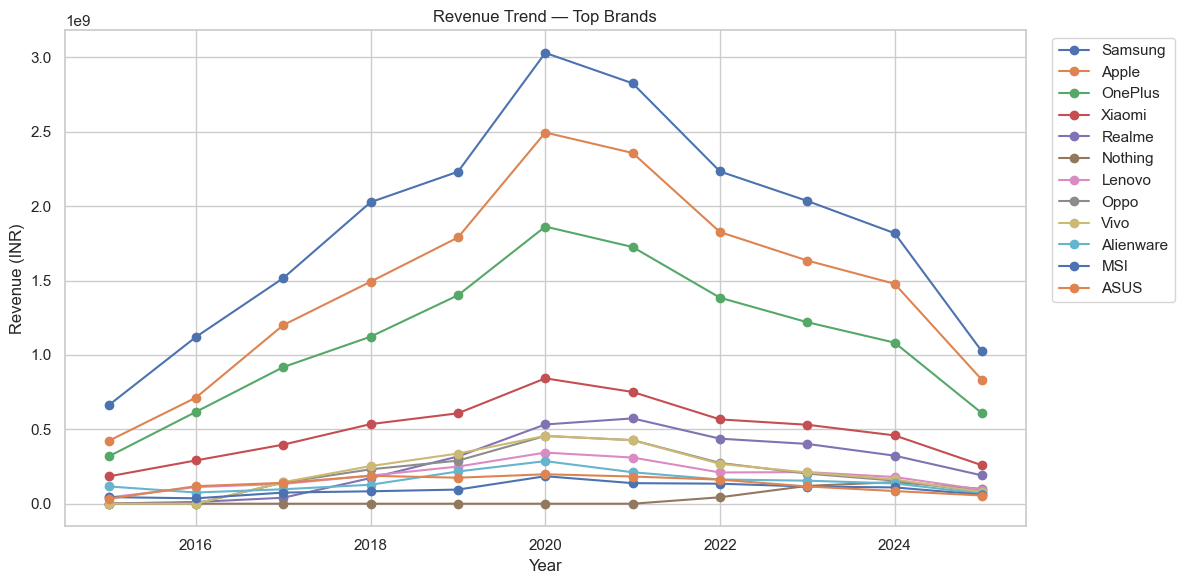

Saved CSVs to /mnt/data/: brand_revenue_by_year.csv, brand_share_by_year_top.csv, brand_category_latest_year.csv, brand_hhi_by_category.csv


In [176]:
# Brand comparison, market-share trends, and competitive positioning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")

# Ensure revenue column exists
if 'final_amount_inr' not in df.columns:
    raise KeyError("Provide 'final_amount_inr' (revenue) in df")

# --- 1) Brand x Year revenue pivot ---
brand_year = df.groupby(['order_year', 'brand'])['final_amount_inr'].sum().reset_index()
brand_pivot = brand_year.pivot(index='order_year', columns='brand', values='final_amount_inr').fillna(0).sort_index()

# --- 2) Leaderboard: latest year & YoY growth ---
latest_year = brand_pivot.index.max()
prev_year = latest_year - 1 if (latest_year - 1) in brand_pivot.index else None

latest_rev = brand_pivot.loc[latest_year].sort_values(ascending=False)
if prev_year is not None:
    prev_rev = brand_pivot.loc[prev_year].reindex(latest_rev.index).fillna(0)
    leaderboard = pd.DataFrame({
        'brand': latest_rev.index,
        'rev_latest': latest_rev.values,
        'rev_prev': prev_rev.values
    })
    leaderboard['yoy_pct'] = np.where(
        leaderboard['rev_prev'] == 0,
        np.nan,
        (leaderboard['rev_latest'] / leaderboard['rev_prev'] - 1) * 100
    )
else:
    leaderboard = pd.DataFrame({
        'brand': latest_rev.index,
        'rev_latest': latest_rev.values
    })
leaderboard = leaderboard.sort_values('rev_latest', ascending=False).reset_index(drop=True)
print(f"Top brands in {latest_year}")
display(leaderboard.head(20).style.format({'rev_latest':'{:}','rev_prev':'{:}','yoy_pct':'{:.1f}%'}))

# --- 3) Market share evolution (stacked area) for top N brands; rest -> 'Other' ---
TOPN = 12
top_brands = leaderboard['brand'].head(TOPN).tolist()
brand_share = brand_pivot.div(brand_pivot.sum(axis=1), axis=0) * 100  # percent
others = [b for b in brand_share.columns if b not in top_brands]
brand_share_top = brand_share.copy()
if len(others) > 0:
    brand_share_top['Other'] = brand_share[others].sum(axis=1)
brand_share_top = brand_share_top[top_brands + (['Other'] if len(others)>0 else [])]

# Static stacked area (matplotlib)
plt.figure(figsize=(12,6))
brand_share_top.plot(kind='area', stacked=True, figsize=(12,6), alpha=0.9)
plt.title(f"Market Share Evolution by Brand (Top {TOPN} + Other) — % Revenue", fontsize=14)
plt.ylabel("Market Share (%)")
plt.xlabel("Year")
plt.legend(title="Brand", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 4) Brand x Category positioning (latest year) — bubble chart ---
by_brand_cat_latest = (
    df[df['order_year'] == latest_year]
    .groupby(['category','brand'])
    .agg(revenue=('final_amount_inr','sum'),
         units=('quantity' if 'quantity' in df.columns else 'final_amount_inr','sum'))
    .reset_index()
)

# compute share within each category
cat_totals = by_brand_cat_latest.groupby('category')['revenue'].sum().rename('cat_revenue').reset_index()
bc = by_brand_cat_latest.merge(cat_totals, on='category')
bc['share_pct'] = bc['revenue'] / bc['cat_revenue'] * 100

# Interactive bubble chart (Plotly)
fig = px.scatter(
    bc,
    x='share_pct',
    y='revenue',
    size='revenue',
    color='category',
    hover_data=['brand','category','share_pct'],
    title=f"Brand Positioning by Category — Year {latest_year}",
    labels={'share_pct':'Share in Category (%)','revenue':'Revenue (INR)'}
)
fig.update_layout(height=600)
fig.show()

# --- 5) HHI per category (Herfindahl-Hirschman Index) for concentration ---
def compute_hhi(share_pct_series):
    s = np.array(share_pct_series) / 100.0
    return np.sum(s**2)

hhi_cat = bc.groupby('category')['share_pct'].apply(compute_hhi).reset_index().rename(columns={'share_pct':'hhi'})
# Interpret: <0.15 unconcentrated, 0.15-0.25 moderate, >0.25 concentrated (fractions)
hhi_cat['interpretation'] = pd.cut(hhi_cat['hhi'], bins=[0,0.15,0.25,1.0], labels=['Unconcentrated','Moderately concentrated','Highly concentrated'])
display(hhi_cat.sort_values('hhi', ascending=False))

# Bar chart for HHI
plt.figure(figsize=(10,5))
sns.barplot(data=hhi_cat.sort_values('hhi',ascending=False), x='hhi', y='category', palette='mako')
plt.title(f"Category Concentration (HHI) — Year {latest_year}")
plt.xlabel("HHI (higher = more concentrated)")
plt.tight_layout()
plt.show()

# --- 6) Rank evolution & movers (rank by revenue each year) ---
brand_rank = brand_pivot.rank(ascending=False, axis=1, method='min').astype(int)
if prev_year is not None:
    rank_change = pd.DataFrame({
        'brand': brand_rank.columns,
        'rank_latest': brand_rank.loc[latest_year].values,
        'rank_prev': brand_rank.loc[prev_year].reindex(brand_rank.columns).values
    })
    rank_change['delta'] = rank_change['rank_prev'] - rank_change['rank_latest']  # positive = improved rank
    rank_change = rank_change.sort_values('delta', ascending=False).reset_index(drop=True)
    print("Top movers since previous year (positive = improved rank):")
    display(rank_change.head(20))
else:
    print("No previous year available for rank change analysis.")

# --- 7) Small-multiples: revenue trend lines for top brands ---
plt.figure(figsize=(12,6))
for b in top_brands:
    if b in brand_pivot.columns:
        plt.plot(brand_pivot.index, brand_pivot[b], marker='o', label=b)
plt.title("Revenue Trend — Top Brands")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.legend(bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()

brand_pivot.to_csv('E:/PROJECT_02/data_set/brand_revenue_by_year.csv')
brand_share_top.to_csv('E:/PROJECT_02/data_set/brand_share_by_year_top.csv')
bc.to_csv('E:/PROJECT_02/data_set/brand_category_latest_year.csv')
hhi_cat.to_csv('E:/PROJECT_02/data_set/brand_hhi_by_category.csv')
print("Saved CSVs to /mnt/data/: brand_revenue_by_year.csv, brand_share_by_year_top.csv, brand_category_latest_year.csv, brand_hhi_by_category.csv")


Question 14

Build customer lifetime value (CLV) analysis using cohort analysis, retention curves, and CLV distribution across different customer segments and acquisition years.


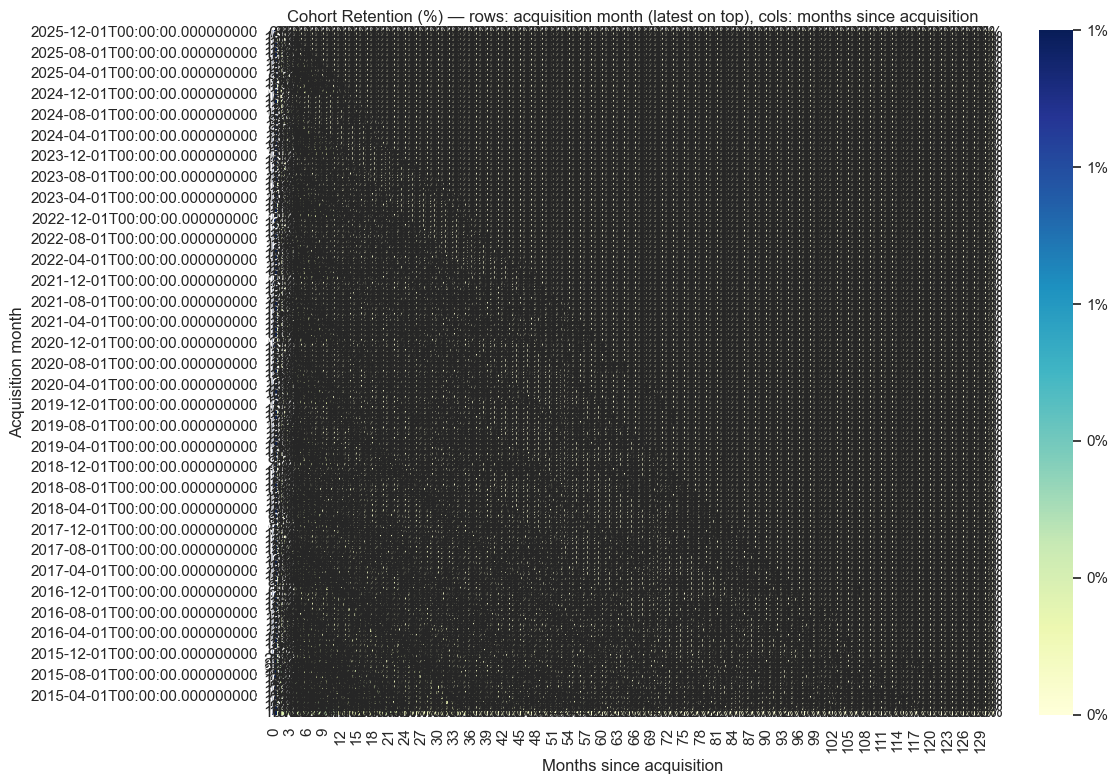

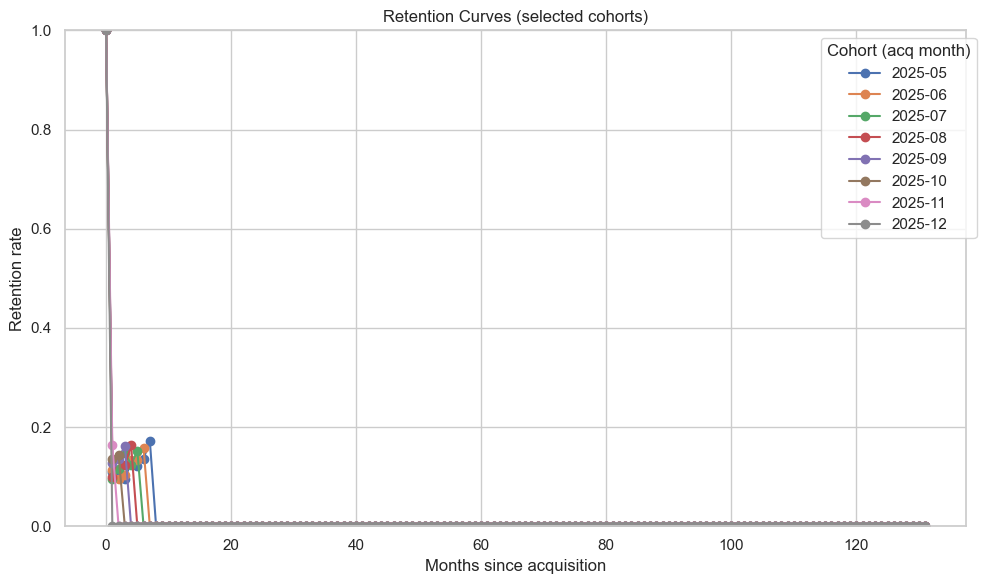

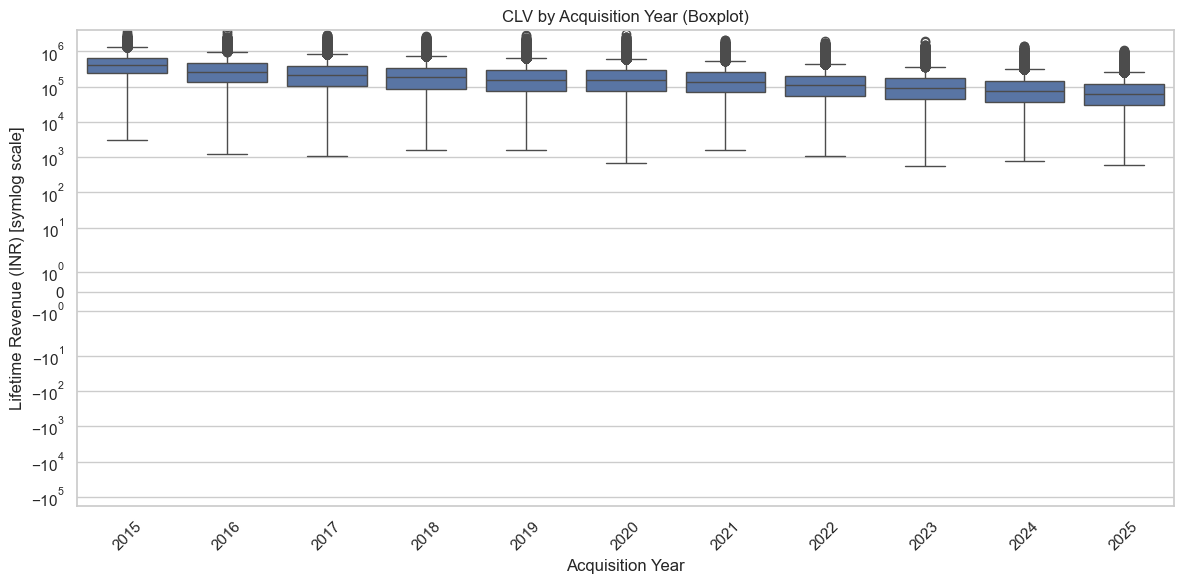

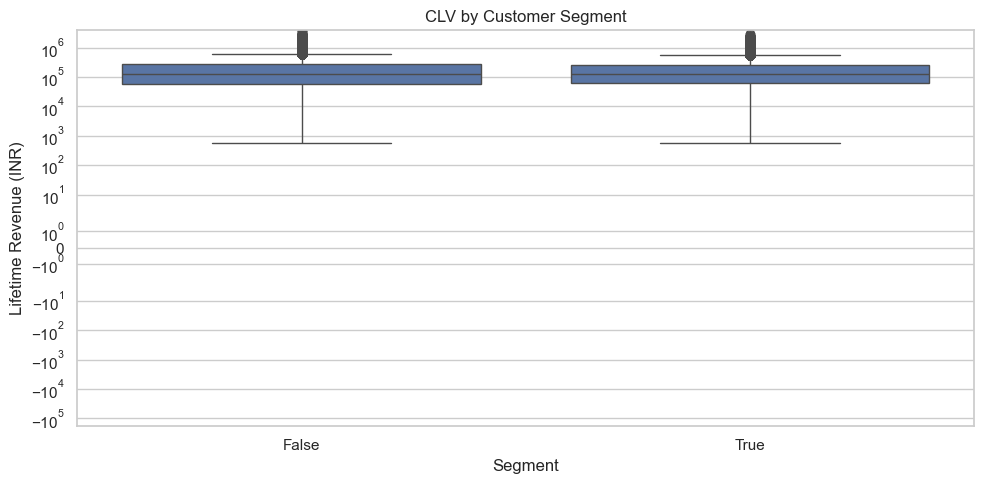

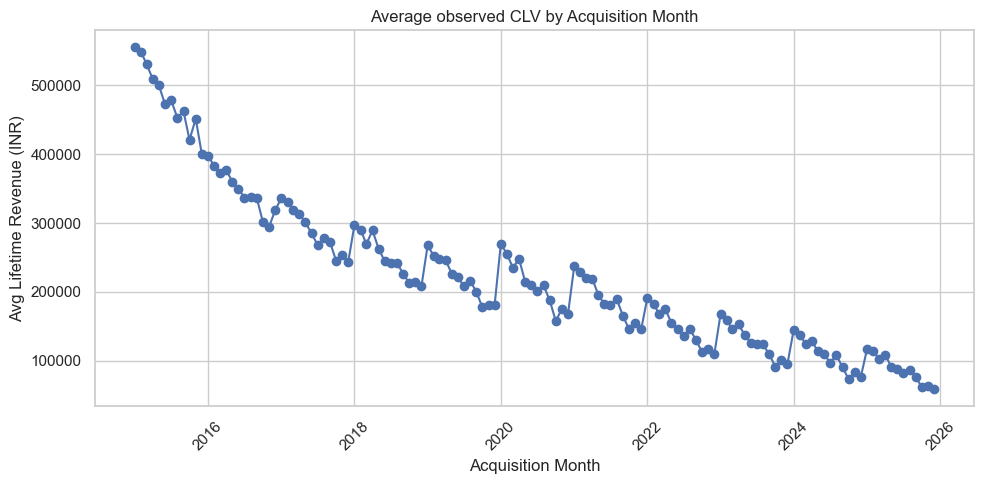

C:\Users\Praveen\AppData\Local\Temp\ipykernel_14188\1406613468.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_clv_by_acq_year, x='acq_year', y='lifetime_value', palette='mako')


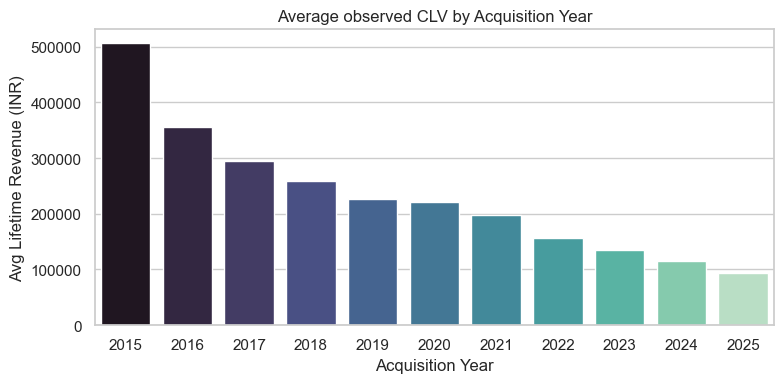

Estimated short-term retention factor r ≈ 0.835
Simple projected CLV (average user) ≈ ₹434,156.90


,acq_year,is_prime_member,num_customers,avg_clv,median_clv,total_revenue
0,2015,False,11087,505797,406066,5607776298
1,2016,False,16295,352682,265731,5746956963
2,2016,True,431,465642,350824,200691745
3,2017,False,20865,285853,205527,5964319201
4,2017,True,2749,365779,269142,1005527515
5,2018,False,24075,239619,169252,5768821515
6,2018,True,6609,324898,228170,2147249500
7,2019,False,25774,200285,140549,5162143908
8,2019,True,11838,281529,196862,3332736730
9,2020,False,23327,177392,129069,4138019017


Saved CSVs and plots to: E:/PROJECT_02/data_set


In [ ]:
# CLV analysis: cohort analysis, retention curves, and CLV distribution (improved)
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set(style="whitegrid")
output_dir = "E:/PROJECT_02/data_set"   # change to your preferred folder
os.makedirs(output_dir, exist_ok=True)

#  Prepare input & columns

df['order_date'] = pd.to_datetime(df['order_date'])

# If acquisition_date not present, derive first purchase date per customer
if 'acquisition_date' in df.columns and not df['acquisition_date'].isna().all():
    df['acquisition_date'] = pd.to_datetime(df['acquisition_date'])
else:
    first_order = df.groupby('customer_id')['order_date'].min().rename('acquisition_date')
    # Merge the series of first_order onto df (one value per customer_id)
    df = df.merge(first_order, left_on='customer_id', right_index=True)

# Optional segment column
segment_col = 'customer_segment' if 'customer_segment' in df.columns else ('is_prime_member' if 'is_prime_member' in df.columns else None)

# Create helpful columns: cohort (acq month), order_month
df['acq_month'] = df['acquisition_date'].dt.to_period('M').dt.to_timestamp()
df['order_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()


# 1. Cohort counts & retention

cohort_counts = (
    df.groupby(['acq_month', 'order_month'])['customer_id']
      .nunique()
      .reset_index(name='active_customers')
)

cohort_counts['cohort_index'] = ((cohort_counts['order_month'].dt.year - cohort_counts['acq_month'].dt.year) * 12 +
                                 (cohort_counts['order_month'].dt.month - cohort_counts['acq_month'].dt.month))

cohort_pivot = cohort_counts.pivot_table(index='acq_month', columns='cohort_index', values='active_customers', aggfunc='sum').fillna(0)
cohort_sizes = cohort_pivot.iloc[:, 0] if 0 in cohort_pivot.columns else cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0).fillna(0)

# Save tables
cohort_pivot.to_csv(os.path.join(output_dir, 'cohort_active_customers_by_month.csv'))
retention.to_csv(os.path.join(output_dir, 'cohort_retention_pct_by_month.csv'))


# 2. Plot retention heatmap

plt.figure(figsize=(12,8))
sns.heatmap(retention.iloc[::-1], annot=True, fmt=".0%", cmap='YlGnBu', vmin=0, vmax=1, cbar_kws={'format':'%.0f%%'})
plt.title("Cohort Retention (%) — rows: acquisition month (latest on top), cols: months since acquisition")
plt.xlabel("Months since acquisition")
plt.ylabel("Acquisition month")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'cohort_retention_heatmap.png'), dpi=150)
plt.show()


# 3. Retention curves (select a few cohorts)

sample_cohorts = retention.index.sort_values()[-8:]  # last 8 cohorts
plt.figure(figsize=(10,6))
for ac in sample_cohorts:
    vals = retention.loc[ac].fillna(0).values
    plt.plot(range(len(vals)), vals, marker='o', label=pd.to_datetime(ac).strftime('%Y-%m'))
plt.legend(title='Cohort (acq month)', bbox_to_anchor=(1.02,1))
plt.title("Retention Curves (selected cohorts)")
plt.xlabel("Months since acquisition")
plt.ylabel("Retention rate")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'retention_curves.png'), dpi=150)
plt.show()

# 4. Revenue per customer & cumulative CLV

rev_monthly = df.groupby(['customer_id', 'order_month'])['final_amount_inr'].sum().reset_index()
rev_monthly = rev_monthly.merge(df[['customer_id','acq_month']].drop_duplicates('customer_id'), on='customer_id', how='left')
rev_monthly['cohort_index'] = ((rev_monthly['order_month'].dt.year - rev_monthly['acq_month'].dt.year) * 12 +
                              (rev_monthly['order_month'].dt.month - rev_monthly['acq_month'].dt.month))
rev_monthly = rev_monthly.sort_values(['customer_id','cohort_index'])
rev_monthly['cum_revenue'] = rev_monthly.groupby('customer_id')['final_amount_inr'].cumsum()

clv_customer = df.groupby('customer_id')['final_amount_inr'].sum().rename('lifetime_value').reset_index()
clv_customer = clv_customer.merge(df[['customer_id','acq_month']].drop_duplicates('customer_id'), on='customer_id', how='left')
clv_customer['acq_year'] = clv_customer['acq_month'].dt.year
if segment_col:
    seg_df = df[['customer_id', segment_col]].drop_duplicates('customer_id')
    clv_customer = clv_customer.merge(seg_df, on='customer_id', how='left')

clv_customer.to_csv(os.path.join(output_dir, 'clv_customer.csv'), index=False)

# 5. CLV distribution plots

plt.figure(figsize=(12,6))
sns.boxplot(data=clv_customer[clv_customer['acq_year'].notna()], x='acq_year', y='lifetime_value')
plt.yscale('symlog')
plt.title("CLV by Acquisition Year (Boxplot)")
plt.xlabel("Acquisition Year")
plt.ylabel("Lifetime Revenue (INR) [symlog scale]")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'clv_by_acq_year_boxplot.png'), dpi=150)
plt.show()

if segment_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=clv_customer, x=segment_col, y='lifetime_value')
    plt.yscale('symlog')
    plt.title("CLV by Customer Segment")
    plt.xlabel("Segment")
    plt.ylabel("Lifetime Revenue (INR)")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'clv_by_segment_boxplot.png'), dpi=150)
    plt.show()

# 6. Average CLV per cohort (acq month / acq year)

avg_clv_by_acq_month = clv_customer.groupby('acq_month')['lifetime_value'].mean().reset_index()
avg_clv_by_acq_month.to_csv(os.path.join(output_dir, 'avg_clv_by_acq_month.csv'))

plt.figure(figsize=(10,5))
plt.plot(avg_clv_by_acq_month['acq_month'], avg_clv_by_acq_month['lifetime_value'], marker='o')
plt.title("Average observed CLV by Acquisition Month")
plt.xlabel("Acquisition Month")
plt.ylabel("Avg Lifetime Revenue (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'avg_clv_by_acq_month.png'), dpi=150)
plt.show()

avg_clv_by_acq_year = clv_customer.groupby('acq_year')['lifetime_value'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=avg_clv_by_acq_year, x='acq_year', y='lifetime_value', palette='mako')
plt.title("Average observed CLV by Acquisition Year")
plt.xlabel("Acquisition Year")
plt.ylabel("Avg Lifetime Revenue (INR)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'avg_clv_by_acq_year.png'), dpi=150)
plt.show()
avg_clv_by_acq_year.to_csv(os.path.join(output_dir, 'avg_clv_by_acq_year.csv'))


# 7. Simple projected CLV (cohort-based)

aru = rev_monthly.groupby('cohort_index')['final_amount_inr'].mean().rename('ARPU').reset_index()
retention_short = retention.iloc[:, :7].copy() if retention.shape[1] >= 7 else retention.copy()

ratios = []
for t in range(0, max(1, retention_short.shape[1]-1)):
    denom = retention_short[t].replace(0, np.nan)
    ratio = (retention_short[t+1] / denom).dropna()
    if not ratio.empty:
        ratios.append(ratio.mean())
r = np.nanmean(ratios) if len(ratios)>0 else 0.4
print(f"Estimated short-term retention factor r ≈ {r:.3f}")

arpu0 = aru.loc[aru['cohort_index']==0, 'ARPU'].values
arpu1 = aru.loc[aru['cohort_index']==1, 'ARPU'].values
if len(arpu0)>0 and len(arpu1)>0:
    a0, a1 = arpu0[0], arpu1[0]
    if r < 0.99:
        clv_proj = a0 + (a1 * r / (1 - r))
    else:
        clv_proj = a0 + a1 * 12
else:
    clv_proj = clv_customer['lifetime_value'].median()
print(f"Simple projected CLV (average user) ≈ ₹{clv_proj:,.2f}")

# 8. CLV by segment & acquisition year table (report)
group_cols = ['acq_year']
if segment_col:
    group_cols.append(segment_col)

clv_summary = clv_customer.groupby(group_cols)['lifetime_value'].agg(['count', 'mean','median','sum']).reset_index().rename(columns={
    'count':'num_customers','mean':'avg_clv','median':'median_clv','sum':'total_revenue'
})
clv_summary.to_csv(os.path.join(output_dir, 'clv_summary_by_acq_year_segment.csv'))
display(clv_summary.head(40).style.format({'avg_clv':'{:.0f}','median_clv':'{:.0f}','total_revenue':'{:.0f}'}))

print("Saved CSVs and plots to:", output_dir)


Question 15

Analyze discount and promotional effectiveness. Create discount impact analysis showing correlation between discount percentages, sales volumes, and revenue across categories and time periods.


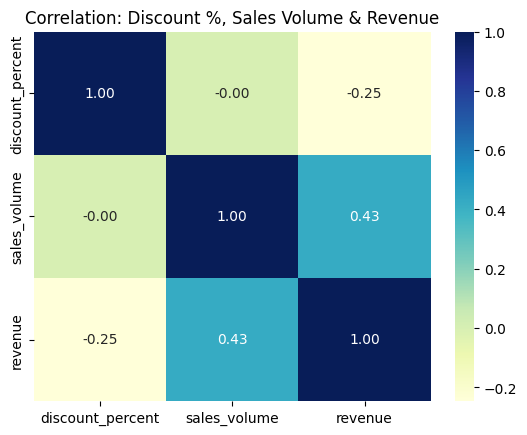

C:\Users\Praveen\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


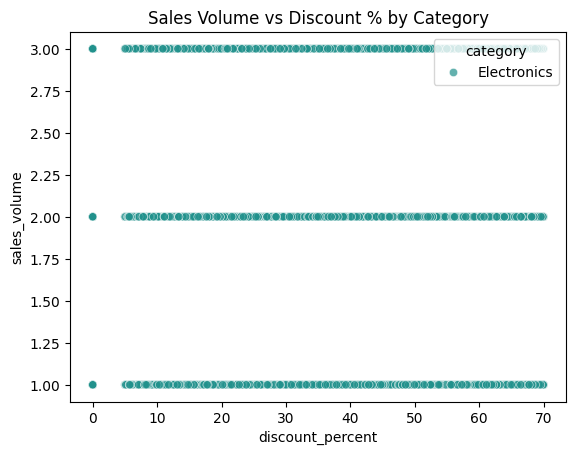

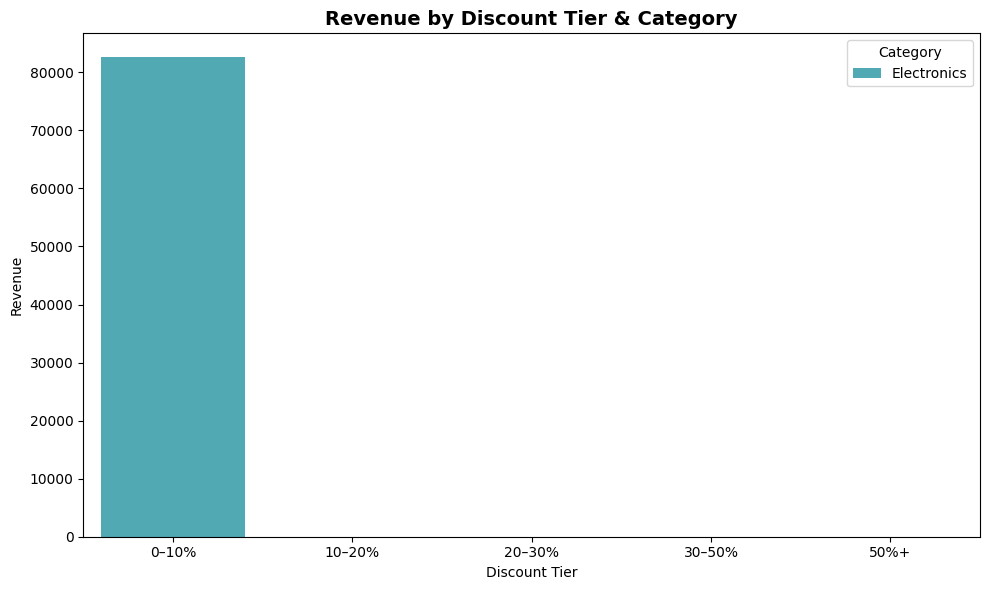

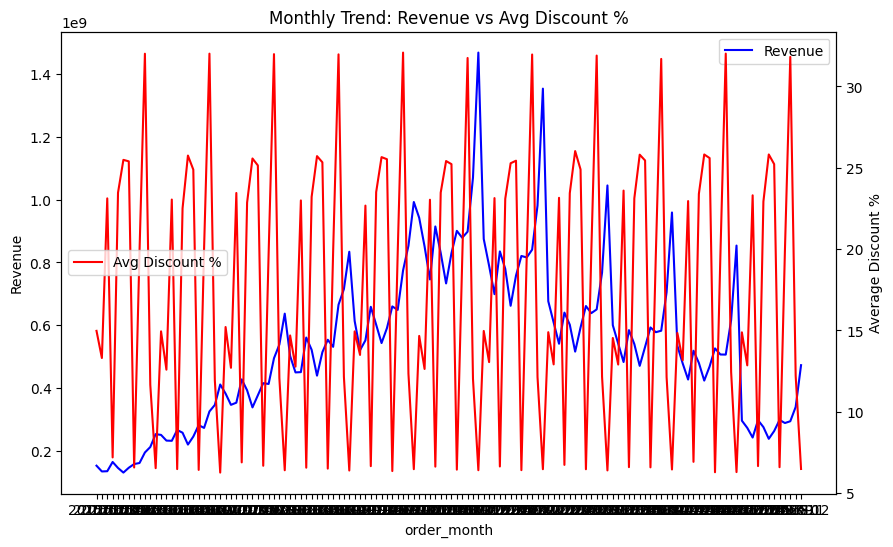

In [17]:
# Sample preparation
df['revenue'] = df['final_amount_inr'] 
df['sales_volume'] = df['quantity']


#1. Correlation matrix
corr = df[['discount_percent', 'sales_volume', 'revenue']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation: Discount %, Sales Volume & Revenue")
plt.show()

# 2. Discount vs Sales Volume by category Scatter
sns.scatterplot(
    data=df, x='discount_percent', y='sales_volume',
    hue='category', alpha=0.7, palette='viridis'
)
plt.title("Sales Volume vs Discount % by Category")
plt.show()


# 3. Revenu by Discount tier barchart
df['discount_tier'] = pd.cut(
    df['discount_percent'],
    bins=[0, 0.1, 0.2, 0.3, 0.5, 1.0],
    labels=['0–10%', '10–20%', '20–30%', '30–50%', '50%+'],
    include_lowest=True
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,      
    x='discount_tier',
    y='revenue',
    hue='category',
    errorbar=None,               # disables confidence intervals
    palette='YlGnBu'
)
plt.title("Revenue by Discount Tier & Category", fontsize=14, fontweight='bold')
plt.xlabel("Discount Tier")
plt.ylabel("Revenue")
plt.legend(title='Category', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()



# 4. Time trend: average discount vs revenue
monthly = df.groupby('order_month').agg({
    'discount_percent':'mean',
    'revenue':'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
sns.lineplot(data=monthly, x='order_month', y='revenue', ax=ax1, color='blue', label='Revenue')
sns.lineplot(data=monthly, x='order_month', y='discount_percent', ax=ax2, color='red', label='Avg Discount %')
ax1.set_ylabel("Revenue")
ax2.set_ylabel("Average Discount %")
plt.title("Monthly Trend: Revenue vs Avg Discount %")
plt.xticks(rotation=45)
plt.show()



Question 16

Study product rating patterns and their impact on sales. Analyze rating distributions, correlation with sales performance, and identify patterns across categories and price ranges.


In [22]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'order_day', 'revenue', 'sales_volume',
       'discount_tier'],
      dtype='object')

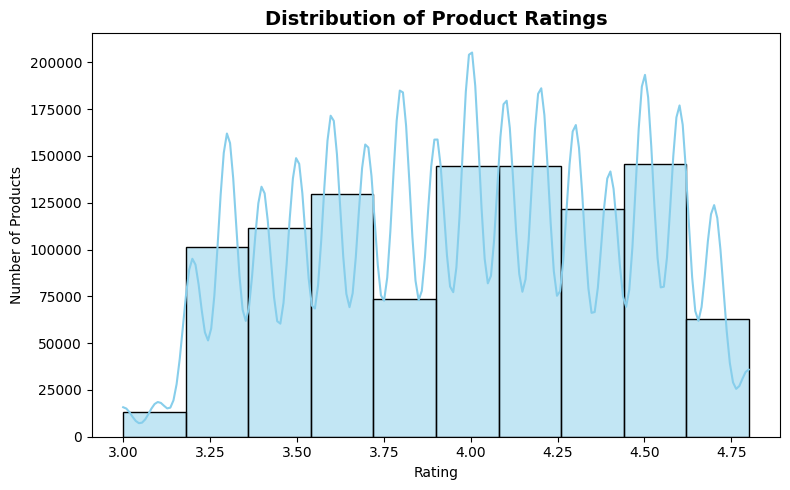

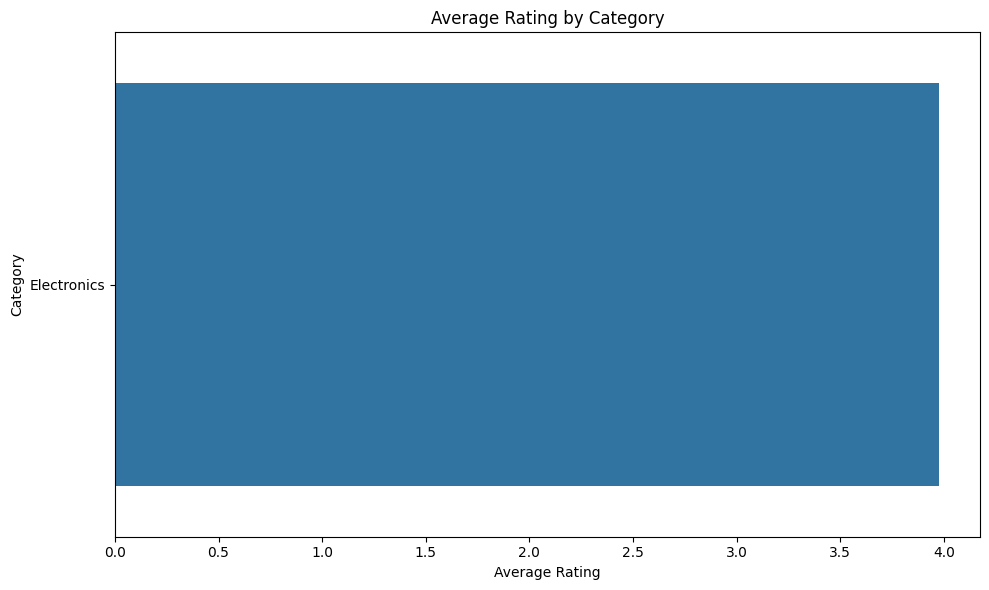

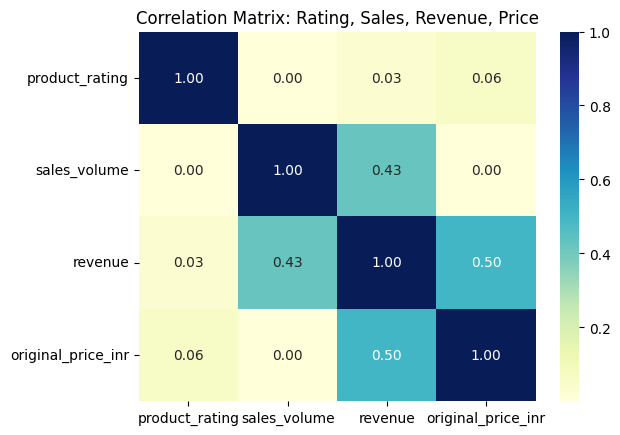

In [27]:
#1.Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['product_rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Product Ratings", fontsize=14, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()

#2.Average Rating by Category
cat_rating = df.groupby('category')['product_rating'].mean().reset_index().sort_values('product_rating', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=cat_rating, x='product_rating', y='category')
plt.title("Average Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

#3.Correlation Between Rating, Sales, and Price
corr = df[['product_rating', 'sales_volume', 'revenue', 'original_price_inr']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix: Rating, Sales, Revenue, Price")
plt.show()



Question 17

Create customer journey analysis showing purchase frequency patterns, category transitions, and customer evolution from first purchase to loyal customers using flow diagrams and transition matrices.


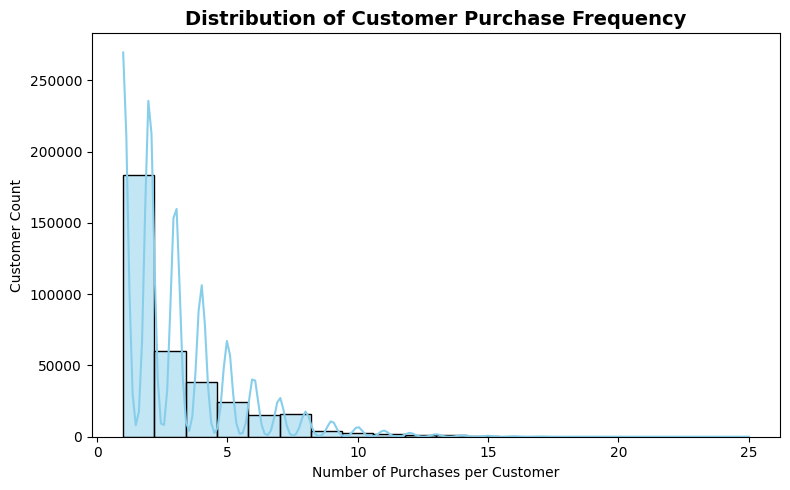

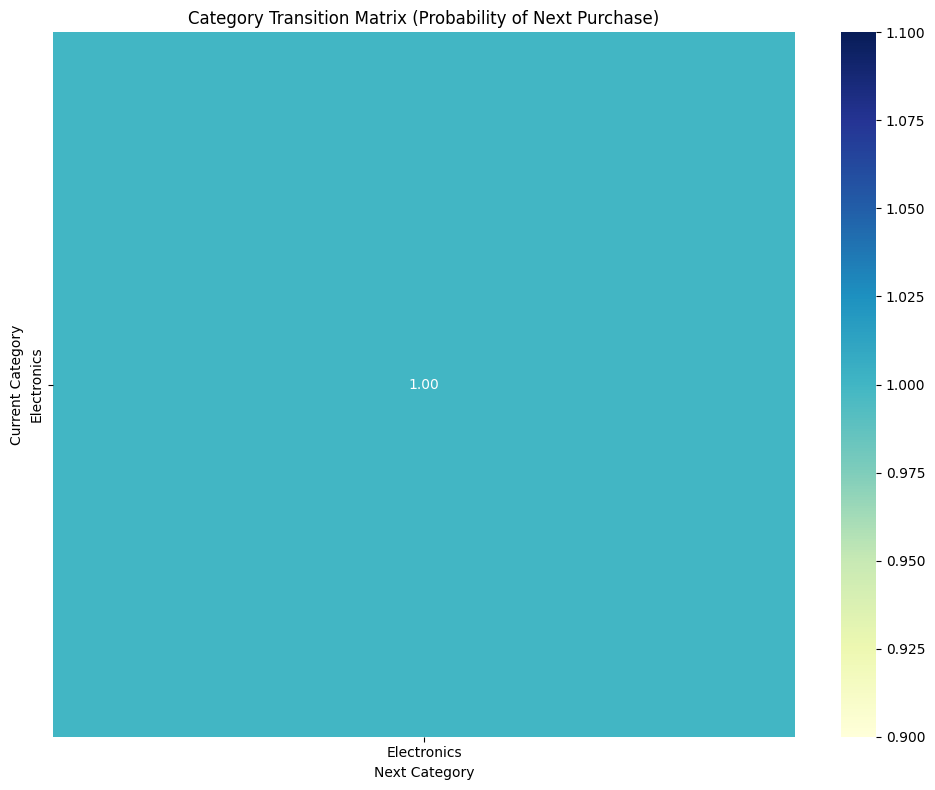

C:\Users\Praveen\AppData\Local\Temp\ipykernel_13496\45431865.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='YlGnBu')


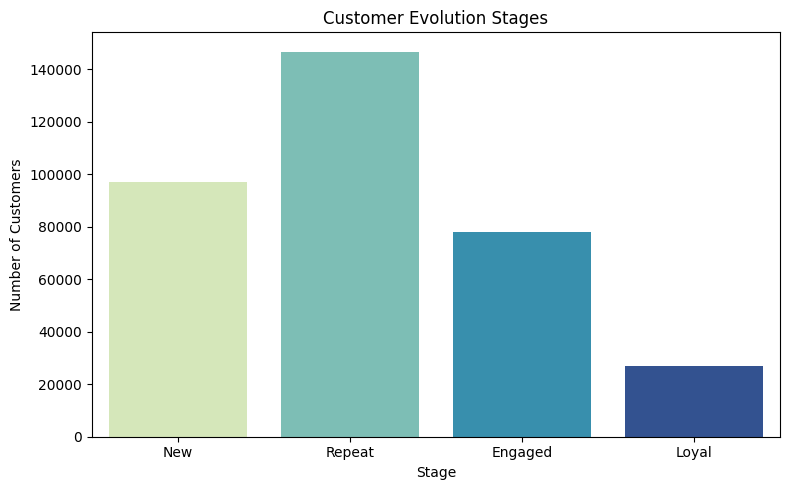

In [ ]:

df['purchase_number'] = df.groupby('customer_id').cumcount() + 1

#1.Purchase Frequency Distribution
freq = df.groupby('customer_id')['transaction_id'].nunique().reset_index(name='purchase_count')

plt.figure(figsize=(8,5))
sns.histplot(freq['purchase_count'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Customer Purchase Frequency", fontsize=14, fontweight='bold')
plt.xlabel("Number of Purchases per Customer")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()

#2.Category Transition Matrix
# Create current and next category pairs
df['next_category'] = df.groupby('customer_id')['category'].shift(-1)
transitions = (
    df.dropna(subset=['next_category'])
      .groupby(['category', 'next_category'])
      .size()
      .reset_index(name='count')
)

# Normalize to get transition probabilities
transition_matrix = transitions.pivot(index='category', columns='next_category', values='count').fillna(0)
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

plt.figure(figsize=(10,8))
sns.heatmap(transition_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Category Transition Matrix (Probability of Next Purchase)")
plt.xlabel("Next Category")
plt.ylabel("Current Category")
plt.tight_layout()
plt.show()

#3.Customer Evolution Stages
def label_stage(n):
    if n == 1: return 'New'
    elif n <= 3: return 'Repeat'
    elif n <= 6: return 'Engaged'
    else: return 'Loyal'

freq['stage'] = freq['purchase_count'].apply(label_stage)

stage_counts = freq['stage'].value_counts().reindex(['New','Repeat','Engaged','Loyal'])

plt.figure(figsize=(8,5))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='YlGnBu')
plt.title("Customer Evolution Stages")
plt.xlabel("Stage")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()



Question 18

Analyze inventory and product lifecycle patterns. Study product launch success, decline phases, and category evolution over the decade with detailed trend analysis.


In [41]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'order_day', 'revenue', 'sales_volume',
       'discount_tier', 'purchase_number', 'next_category', 'launch_date'],
      dtype='object')

In [43]:
# Ensure datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['launch_date'] = pd.to_datetime(df['launch_date'], errors='coerce')

# Drop rows where either date couldn’t be parsed
df_cleaned = df.dropna(subset=['launch_date', 'order_date']).copy()

# Calculate weeks since launch
df_cleaned['week_since_launch'] = ((df_cleaned['order_date'] - df_cleaned['launch_date']).dt.days // 7).astype(int)

# Aggregate sales
life_cycle = (
    df_cleaned.groupby(['order_year', 'week_since_launch'])['final_amount_inr']
    .sum()
    .reset_index()
)
df[['order_date','launch_date']].head()



,order_date,launch_date
0,2023-07-23,2021-01-01
1,2021-07-20,2020-01-01
2,2017-11-16,2017-01-01
3,2020-05-04,2019-01-02
4,2018-10-09,2016-01-01


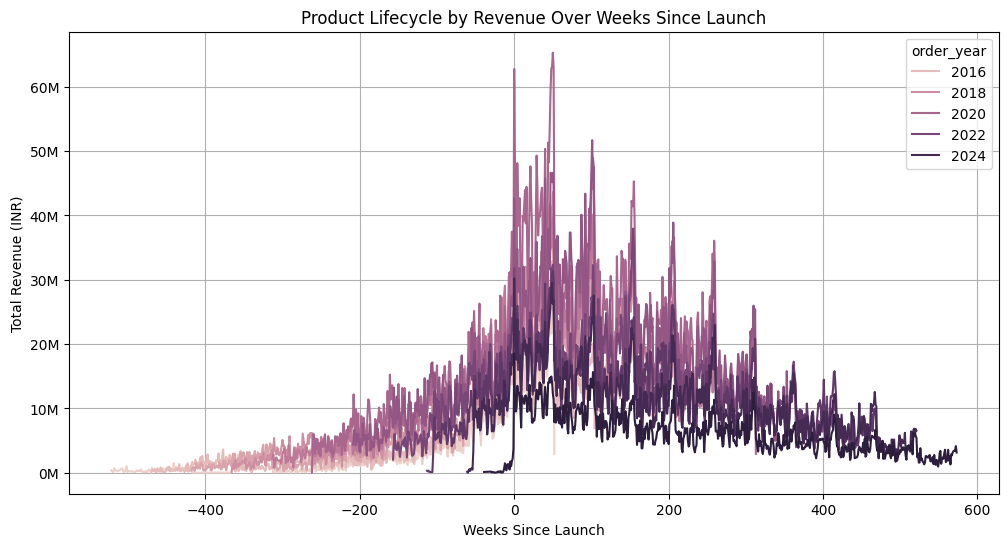

In [ ]:
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 6))
sns.lineplot(data=life_cycle, x='week_since_launch', y='final_amount_inr', hue='order_year')
plt.title('Product Lifecycle by Revenue Over Weeks Since Launch')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Total Revenue (INR)')
plt.grid(True)

# Format y-axis labels to display in a more readable format (e.g., in millions or with currency symbols)
formatter = mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M') # Format in millions
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [22]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'order_day', 'festival_period'],
      dtype='object')

Question 19

Build competitive pricing analysis comparing brand positioning, price ranges, and market penetration strategies across different product categories using box plots and competitive matrices


C:\Users\Praveen\AppData\Local\Temp\ipykernel_4488\1790714026.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




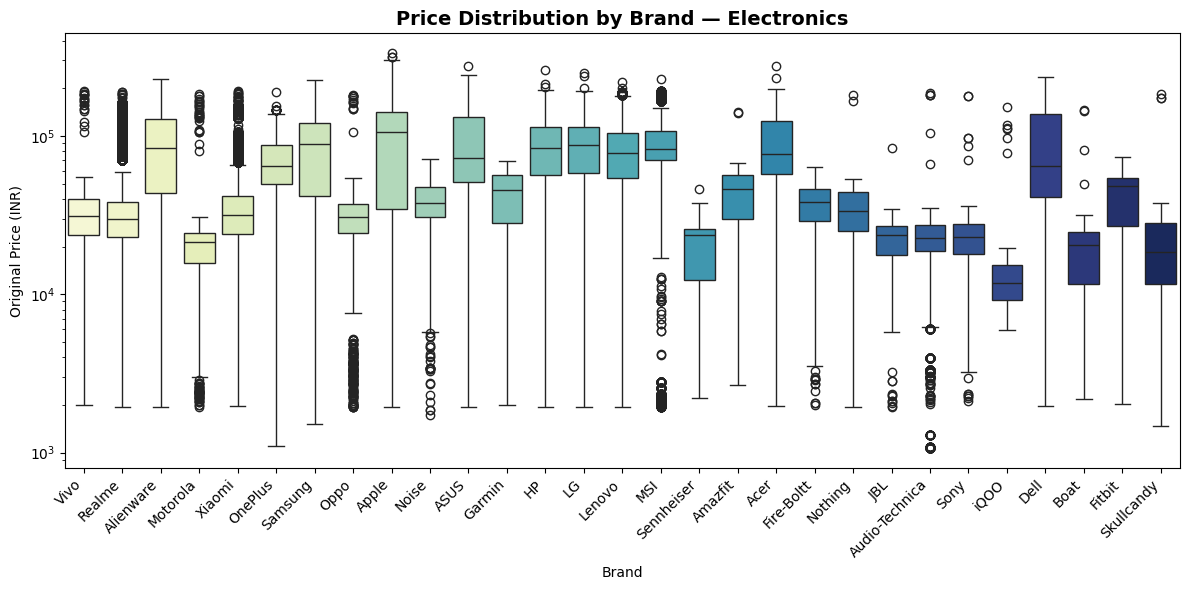

In [41]:
#Quick brand by category summary table
brand_cat = (df.groupby(['brand','category'])
              .agg(units_sold=('quantity','sum'),
                   revenue=('final_amount_inr','sum'),
                   median_price=('original_price_inr','median'),
                   p25_price=('original_price_inr', lambda x: np.percentile(x,25)),
                   p75_price=('original_price_inr', lambda x: np.percentile(x,75)),
                   n_products=('product_id','nunique'))
              .reset_index())

#Price Distribution by Brand
def boxplot_by_brand(category_name):
    sub = df[df['category'] == category_name]
    plt.figure(figsize=(12,6))

    sns.boxplot(
        data=sub,
        x='brand',
        y='original_price_inr',  
        palette='YlGnBu'
    )

    plt.yscale('log')  # optional if price range is wide
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Price Distribution by Brand — {category_name}', fontsize=14, fontweight='bold')
    plt.xlabel("Brand")
    plt.ylabel("Original Price (INR)")
    plt.tight_layout()
    plt.show()

# Example usage
boxplot_by_brand('Electronics')




Question 20

Create a comprehensive business health dashboard combining key metrics like revenue growth, customer acquisition, retention rates, and operational efficiency using multi-panel visualizations with executive summary insights.


In [17]:
df.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'order_day', 'price_inr', 'revenue_inr',
       'order_week'],
      dtype='object')

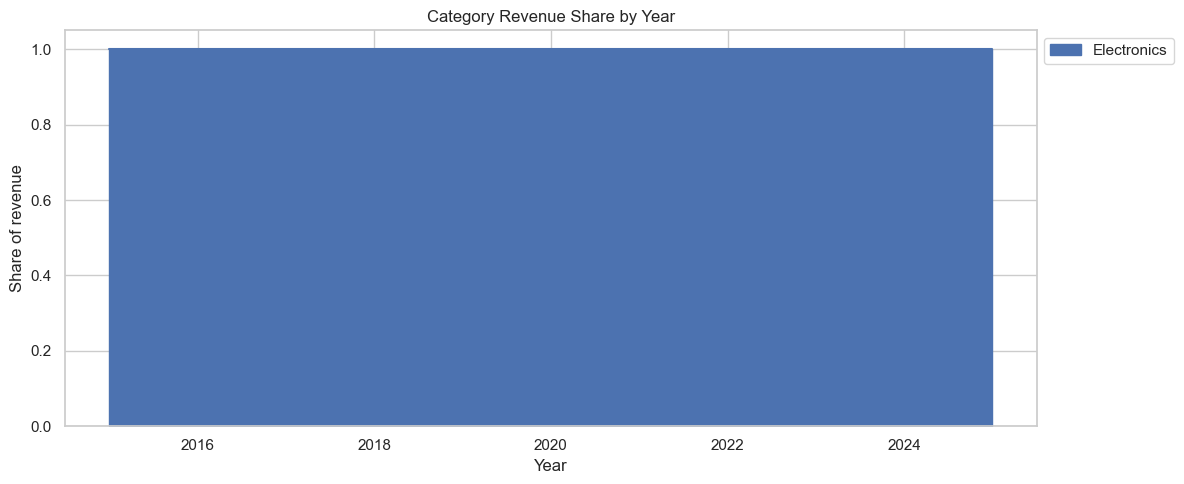

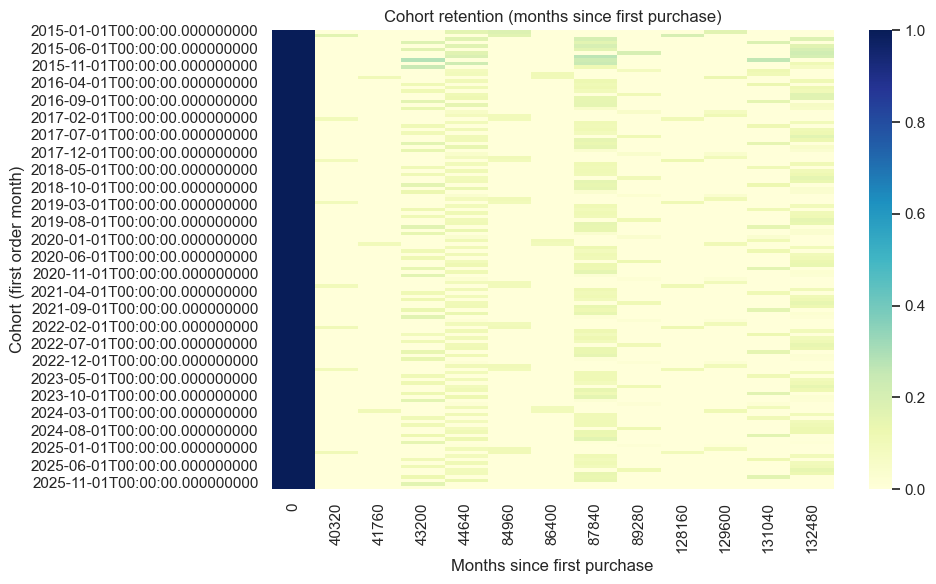

Repeat rate: 72.15%  — single-purchase customers: 97068

Avg orders/day: 261.2, Avg items/order: 1.25
SKU summary: total skus=2004, slow_movers(<=2)=0, fast_movers(>=50)=1857


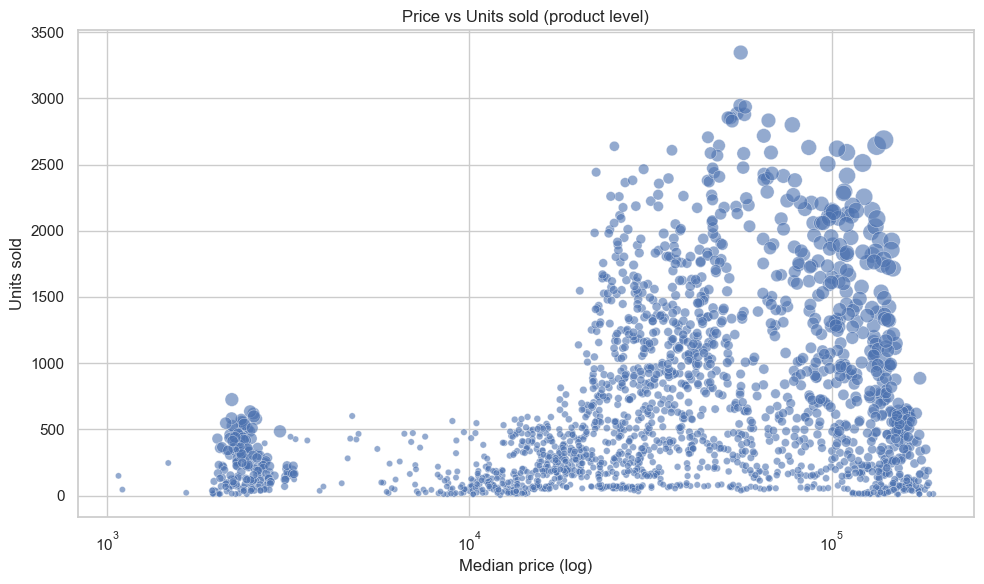

In [ ]:
# === Business Health Dashboard — EDA (runnable) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter

# 1. Category revenue & growth
cat_year = df.groupby(['category','order_year']).agg(revenue=('final_amount_inr','sum')).reset_index()
# pivot for stacked area share
pivot = cat_year.pivot(index='order_year', columns='category', values='revenue').fillna(0)
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)
pivot_pct.plot(kind='area', figsize=(12,5), stacked=True)
plt.title('Category Revenue Share by Year')
plt.ylabel('Share of revenue'); plt.xlabel('Year'); plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

# 2. Cohort retention (monthly cohorts) 
# cohort = month of first purchase -> retention over months
df_cohort = df.copy()
df_cohort['first_order_month'] = df_cohort.sort_values('order_date').groupby('customer_id')['order_date'].transform('min').dt.to_period('M').dt.to_timestamp()
df_cohort['order_month'] = df_cohort['order_date'].dt.to_period('M').dt.to_timestamp()

cohort_counts = (df_cohort.groupby(['first_order_month','order_month'])['customer_id']
                 .nunique().reset_index(name='n_customers'))

cohort_counts['period_index'] = ((cohort_counts['order_month'] - cohort_counts['first_order_month'])/np.timedelta64(1,'m')).round().astype(int)
cohort_pivot = cohort_counts.pivot_table(index='first_order_month', columns='period_index', values='n_customers', aggfunc='sum').fillna(0)
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.div(cohort_size, axis=0).iloc[:,-1] if False else cohort_pivot.div(cohort_size, axis=0)  # full table

# show heatmap for first 12 months
ret_12 = retention.iloc[: , :13]
plt.figure(figsize=(10,6))
sns.heatmap(ret_12, cmap='YlGnBu', fmt='.2f')
plt.title('Cohort retention (months since first purchase)')
plt.xlabel('Months since first purchase'); plt.ylabel('Cohort (first order month)')
plt.tight_layout()
plt.show()

#Churn / Repeat rate
cust_orders = df.groupby('customer_id')['transaction_id'].nunique().reset_index(name='orders')
single_buyers = (cust_orders['orders']==1).sum()
repeat_rate = 1 - (single_buyers / cust_orders.shape[0])
print(f"Repeat rate: {repeat_rate:.2%}  — single-purchase customers: {single_buyers}")


#  Operational efficiency proxies
orders_per_day = df.groupby(df['order_date'].dt.date)['transaction_id'].nunique().mean()
items_per_order = df['quantity'].sum() / (df['transaction_id'].nunique()+1e-9)
print(f"\nAvg orders/day: {orders_per_day:.1f}, Avg items/order: {items_per_order:.2f}")

# SKU-level signals (inventory proxies)
sku = df.groupby('product_id').agg(units_sold=('quantity','sum'), revenue=('revenue_inr','sum')).reset_index()
slow_movers = sku[sku['units_sold'] <= 2].shape[0]
fast_movers = sku[sku['units_sold'] >= 50].shape[0]
print(f"SKU summary: total skus={sku.shape[0]}, slow_movers(<=2)={slow_movers}, fast_movers(>=50)={fast_movers}")

# 3. Price / promotion impact (scatter) 
prod = df.groupby('product_id').agg(median_price=('price_inr','median'), units=('quantity','sum'), revenue=('revenue_inr','sum')).reset_index()
plt.figure(figsize=(10,6))
sns.scatterplot(data=prod, x='median_price', y='units', size='revenue', sizes=(20,200), alpha=0.6, legend=False)
plt.xscale('log'); plt.xlabel('Median price (log)'); plt.ylabel('Units sold'); plt.title('Price vs Units sold (product level)')
plt.tight_layout(); plt.show()